In [1]:
# import required packages, though not all of them are actually used
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.mlab as mlab
import matplotlib.dates as mpl_dates
%matplotlib inline

import mplfinance as mpf 
from mplfinance.original_flavor import candlestick_ohlc
# set fig size; bigger DPI results in bigger fig
plt.rcParams["figure.dpi"] = 100

import seaborn as sns
import pandas as pd
import numpy as np
import sympy as sp
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
from statsmodels.stats.stattools import durbin_watson as sdw
import statsmodels.stats.libqsturng
import plotly.express as px
from datetime import datetime

import stemgraphic as stem

# from ete3 import Tree, faces, AttrFace, TreeStyle, TextFace

# from mgt2001 import *

import mgt2001
from mgt2001.hyp.ind import two_population, two_population_proportion
import mgt2001.hyp.anova as anova
import mgt2001.hyp.chi2 as chi2
import mgt2001.hyp.non as non

import random
import itertools
import math

plt.style.use('ggplot') # refined style

import warnings
warnings.filterwarnings("ignore")

mgt2001.__version__ # show version of mgt2001

'0.4.1.4'

## 資料處理

In [2]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

display(movie_df.head())
display(movie_df.tail())

id                 title    budget  \
0   4234              Scream 3  40000000   
1   1907             The Beach  40000000   
2  15655      The Tigger Movie  30000000   
3  14181           Boiler Room   7000000   
4   2069  The Whole Nine Yards  41300000   

                                          genres original_language  \
0                          ['Horror', 'Mystery']                en   
1  ['Drama', 'Adventure', 'Romance', 'Thriller']                en   
2              ['Family', 'Animation', 'Comedy']                en   
3                 ['Crime', 'Drama', 'Thriller']                en   
4                            ['Comedy', 'Crime']                en   

                                production_companies release_date  \
0  ['Craven-Maddalena Films', 'Dimension Films', ...   2000-02-03   
1                                  ['Figment Films']   2000-02-03   
2  ['Disney Television Animation', 'DisneyToon St...   2000-02-11   
3                                ['New Line Cinema']   2000-02-18   
4  ['Franchise Pictures', 'Morgan Creek Productio...   2000-02-18   

  TW_release_date    revenue  runtime  ... rating  rotten_aud_score  \
0             NaN  161834276      116  ...      R              37.0   
1             NaN  144056873      119  ...      R              57.0   
2             NaN   45554533       77  ...      G              62.0   
3             NaN   28780255      118  ...      R              78.0   
4             NaN  106371651       98  ...      R              64.0   

    zh_title                belongs_to_collection  has_homepage  \
0  驚聲尖叫3：終結篇                    Scream Collection             0   
1         海灘                                  NaN             0   
2     跳跳虎歷險記                                  NaN             1   
3      搶錢大作戰                                  NaN             0   
4      殺手不眨眼  The Whole Nine/Ten Yards Collection             0   

   has_collection pre_covid  post_covid  release_year  release_month  
0               1         1           0          2000              2  
1               0         1           0          2000              2  
2               0         1           0          2000              2  
3               0         1           0          2000              2  
4               1         1           0          2000              2  

[5 rows x 33 columns]

id                    title     budget  \
3167  460465            Mortal Kombat   20000000   
3168  637649             Wrath of Man   40000000   
3169  520663  The Woman in the Window    4000000   
3170  503736         Army of the Dead   90000000   
3171  337404                  Cruella  200000000   

                                  genres original_language  \
3167  ['Action', 'Fantasy', 'Adventure']                en   
3168                 ['Action', 'Crime']                en   
3169    ['Crime', 'Mystery', 'Thriller']                en   
3170    ['Action', 'Horror', 'Thriller']                en   
3171                 ['Comedy', 'Crime']                en   

                                   production_companies release_date  \
3167  ['Atomic Monster', 'Broken Road Productions', ...   2021-04-07   
3168  ['Miramax', 'Metro-Goldwyn-Mayer', 'Toff Guy F...   2021-04-22   
3169  ['Fox 2000 Pictures', 'Scott Rudin Productions...   2021-05-14   
3170                               ['The Stone Quarry']   2021-05-14   
3171                           ['Walt Disney Pictures']   2021-05-26   

               TW_release_date   revenue  runtime  ... rating  \
3167                       NaN  76706000      110  ...      R   
3168  2021-04-29T00:00:00.000Z  80648577      119  ...      R   
3169                       NaN         0      102  ...      R   
3170                       NaN    780000      148  ...    NaN   
3171                       NaN  46586903      134  ...  PG-13   

      rotten_aud_score  zh_title        belongs_to_collection  has_homepage  \
3167              86.0      真人快打                          NaN             1   
3168              91.0      玩命鈔劫                          NaN             1   
3169              36.0        窺探                          NaN             1   
3170               NaN      活屍大軍  Army of the Dead Collection             1   
3171              97.0  時尚惡女：庫伊拉           Cruella Collection             1   

      has_collection pre_covid  post_covid  release_year  release_month  
3167               0         0           1          2021              4  
3168               0         0           1          2021              4  
3169               0         0           1          2021              5  
3170               1         0           1          2021              5  
3171               1         0           1          2021              5  

[5 rows x 33 columns]

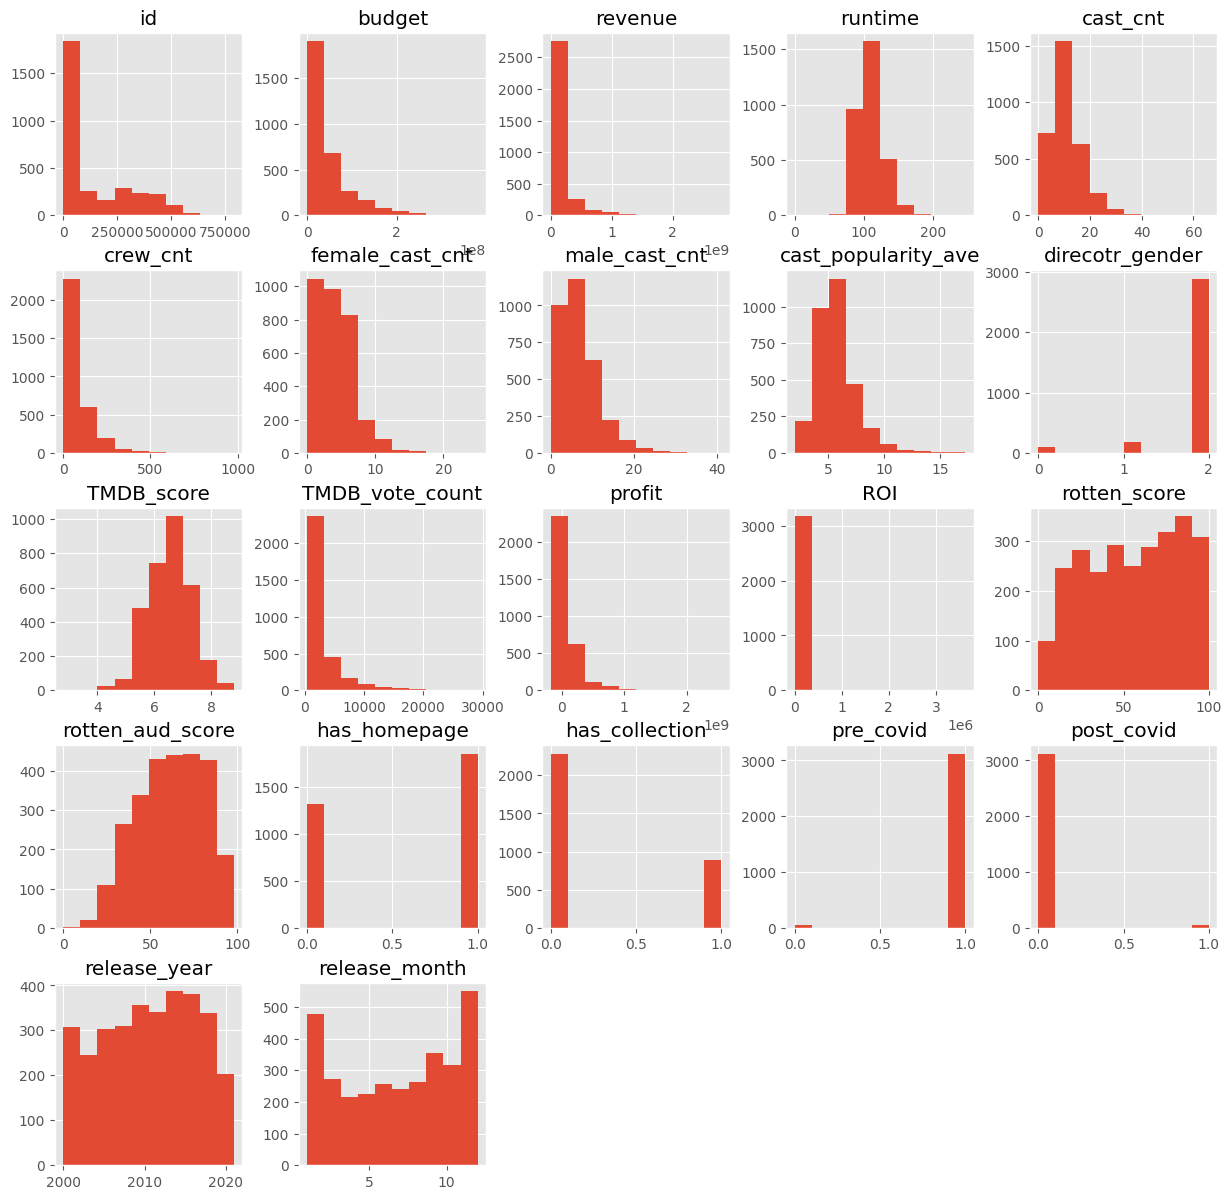

In [3]:
movie_df.hist(figsize=(15, 15))
plt.show()

可以看出裡面有需多 outliers，這些 data points 很可能影響到整體結果，所以我們將不考慮這些電影的計算。

在這邊，我們也可以看到 "revenue"、"budget"、"ROI" 這三個重點項目都不是常態分佈，要做分析的話會有點困難。這時候，我們可以採用 `np.log1p()` 來做 data transformation。如要要做預測的話，則是用 `np.exp1p()` 來還原。這部分，會在去除玩異質之後統一處理。

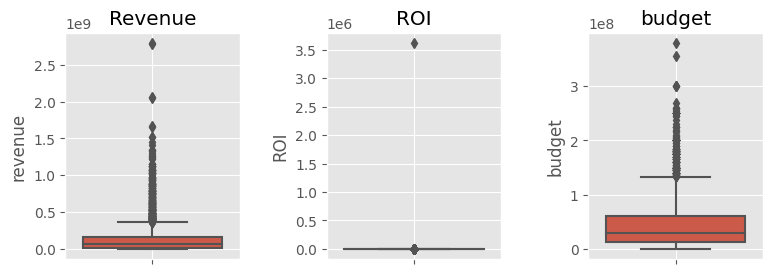

In [4]:
# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

<div class="alert alert-block alert-info">
<b>你知道嗎？</b> 票房最高的電影是 2019 年上映的復仇者聯盟：終局之戰。</div>

In [5]:
movie_df.sort_values(by='revenue', ascending=False).head(20)[['release_date', 'zh_title', 'revenue', 'director']]

release_date           zh_title     revenue         director
3005   2019-04-24         復仇者聯盟：終局之戰  2797800564    Anthony Russo
1339   2009-12-10                阿凡達  2787965087    James Cameron
2418   2015-12-15     STAR WARS：原力覺醒  2068223624      J.J. Abrams
2850   2018-04-25        復仇者聯盟3：無限之戰  2046239637    Anthony Russo
2315   2015-06-06              侏羅紀世界  1671713208  Colin Trevorrow
3032   2019-07-12                獅子王  1656943394      Jon Favreau
1756   2012-04-25              復仇者聯盟  1518815515      Joss Whedon
2287   2015-04-01              玩命關頭7  1515047671        James Wan
3086   2019-11-20              冰雪奇緣2  1450026933       Chris Buck
2298   2015-04-22        復仇者聯盟2：奧創紀元  1405403694      Joss Whedon
2822   2018-02-13                 黑豹  1346739107     Ryan Coogler
1600   2011-07-07      哈利波特：死神的聖物 II  1341511219      David Yates
2795   2017-12-13  STAR WARS：最後的絕地武士  1332539889     Rian Johnson
2866   2018-06-06         侏羅紀世界：殞落國度  1303459585     J. A. Bayona
2035   2013-11-20               冰雪奇緣  1274219009       Chris Buck
2669   2017-03-16              美女與野獸  1263521126      Bill Condon
2871   2018-06-14             超人特攻隊2  1242805359        Brad Bird
2681   2017-04-12              玩命關頭8  1238764765     F. Gary Gray
1915   2013-04-18              鋼鐵人 3  1214811252      Shane Black
2318   2015-06-17                小小兵  1156730962       Kyle Balda

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2248 entries, 0 to 2247
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2248 non-null   int64         
 1   title                  2248 non-null   object        
 2   budget                 2248 non-null   int64         
 3   genres                 2248 non-null   object        
 4   original_language      2248 non-null   object        
 5   production_companies   2248 non-null   object        
 6   release_date           2248 non-null   datetime64[ns]
 7   TW_release_date        500 non-null    object        
 8   revenue                2248 non-null   int64         
 9   runtime                2248 non-null   int64         
 10  cast                   2248 non-null   object        
 11  cast_cnt               2248 non-null   int64         
 12  crew_cnt               2248 non-null   int64         
 13  fem

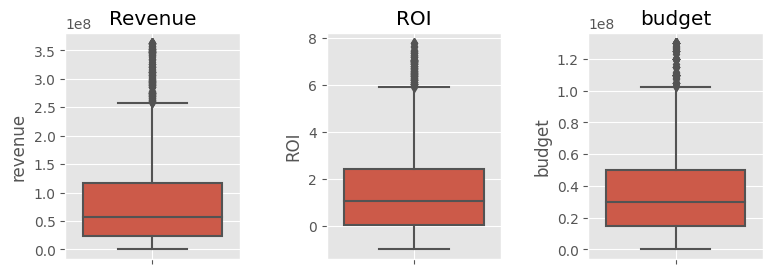

In [6]:
rev_outlier = mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0] # [:20]
roi_outlier = mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0] # [:5]
budget_outlier = mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0] # [:5]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)


plt.show()

In [7]:
u_movie_df.sort_values(by='revenue', ascending=False).head(5)[['release_date', 'title', 'zh_title', 'revenue', 'director', 'release_month']]

release_date                                    title    zh_title  \
1655   2014-12-17  Night at the Museum: Secret of the Tomb     博物館驚魂夜3   
942    2009-04-02                           Fast & Furious       玩命關頭4   
422    2004-12-09                           Ocean's Twelve  瞞天過海2：長驅直入   
1554   2014-03-07                                     Noah        挪亞方舟   
118    2001-07-25                       Planet of the Apes        決戰猩球   

        revenue           director  release_month  
1655  363204635         Shawn Levy             12  
942   363164265         Justin Lin              4  
422   362744280  Steven Soderbergh             12  
1554  362637473   Darren Aronofsky              3  
118   362211740         Tim Burton              7

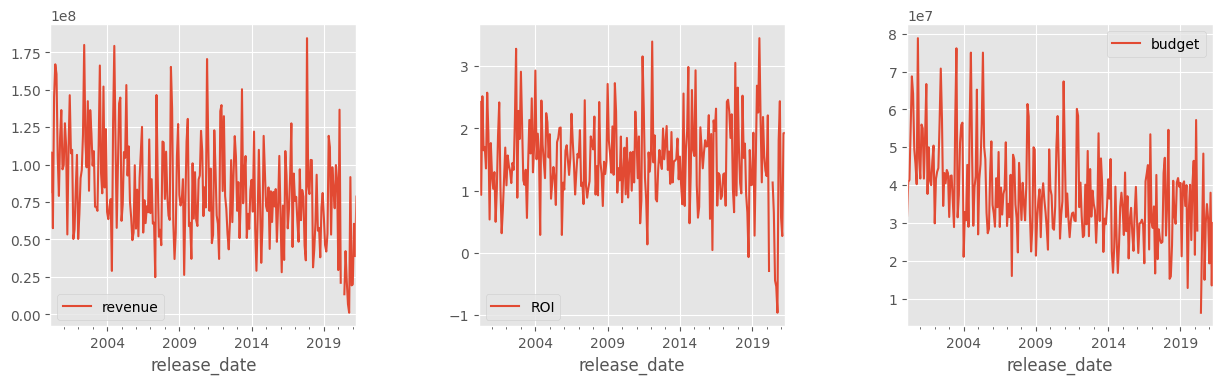

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
u_movie_df.set_index('release_date').resample('M').agg(dict(revenue='mean')).to_period('M').plot(ax=axes[0])
u_movie_df.set_index('release_date').resample('M').agg(dict(ROI='mean')).to_period('M').plot(ax=axes[1])
u_movie_df.set_index('release_date').resample('M').agg(dict(budget='mean')).to_period('M').plot(ax=axes[2])
plt.show()

雖然這明顯地去除掉許多 outliers，但我們可以發現一件事：**去掉 outliers 後，可以看到以前的電影表現比較平均一點，越後期的電影看起來只有少數賣座電影在撐場而已**，最高的是博物館驚魂夜3，其次是玩命關頭系列的玩命關頭4。前十名的電影裡面，幾乎都是一些老牌電影（2012 前上映）。整體收入平均也有明顯的下降趨勢。當然，這對在 2020 和 2021 之間上映的電影來說非常不公平。

所以我們最後只去除前 20 個 outliers 以防止這種一年不如一年的情況發生。

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     2788 non-null   int64         
 1   title                  2788 non-null   object        
 2   budget                 2788 non-null   int64         
 3   genres                 2788 non-null   object        
 4   original_language      2788 non-null   object        
 5   production_companies   2788 non-null   object        
 6   release_date           2788 non-null   datetime64[ns]
 7   TW_release_date        762 non-null    object        
 8   revenue                2788 non-null   int64         
 9   runtime                2788 non-null   int64         
 10  cast                   2788 non-null   object        
 11  cast_cnt               2788 non-null   int64         
 12  crew_cnt               2788 non-null   int64         
 13  fem

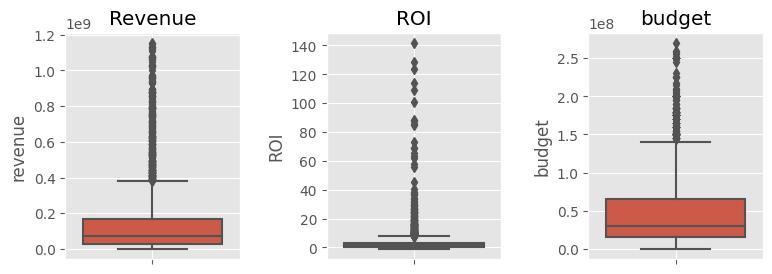

In [9]:
rev_outlier = sorted(mgt2001.des.outlier(movie_df['revenue'].dropna(), show=False)[0], reverse=True)[:20]
roi_outlier = sorted(mgt2001.des.outlier(movie_df['ROI'].dropna(), show=False)[0], reverse=True)[:5]
budget_outlier = sorted(mgt2001.des.outlier(movie_df['budget'].dropna(), show=False)[0], reverse=True)[:5]
                        
def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

rev_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
rev_df = filter_rows_by_values(rev_df, 'revenue', rev_outlier).reset_index(drop=True)
roi_df = filter_rows_by_values(movie_df, 'ROI', roi_outlier).reset_index(drop=True)
budget_df = filter_rows_by_values(movie_df, 'budget', budget_outlier).reset_index(drop=True)

u_movie_df = movie_df[movie_df['revenue'] >= 1e5 * 9] # 排除 90 萬以下票房的資料點（這些點沒有被移除）
u_movie_df = filter_rows_by_values(u_movie_df, 'revenue', rev_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'ROI', roi_outlier).reset_index(drop=True)
u_movie_df = filter_rows_by_values(u_movie_df, 'budget', budget_outlier).reset_index(drop=True)

print(u_movie_df.info()) 

# Plot
fig = plt.figure(figsize=(9, 3))
row, col = 1, 3
fig.subplots_adjust(hspace=0.2, wspace=.5)
ax = fig.add_subplot(row, col, 1)
ax = sns.boxplot(y=u_movie_df['revenue']) # orient='h' results in horizontal boxplot
plt.title('Revenue')
ax.grid(True)
ax = fig.add_subplot(row, col, 2)
ax = sns.boxplot(y=u_movie_df['ROI']) # orient='h' results in horizontal boxplot
plt.title('ROI')
ax.grid(True)

ax = fig.add_subplot(row, col, 3)
ax = sns.boxplot(y=u_movie_df['budget']) # orient='h' results in horizontal boxplot
plt.title('budget')
ax.grid(True)

plt.show()

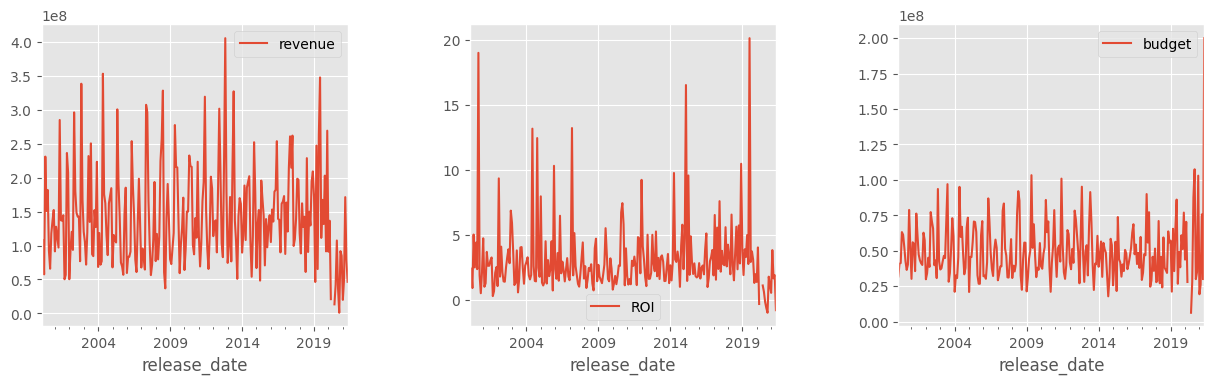

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
u_movie_df.set_index('release_date').resample('M').agg(dict(revenue='mean')).to_period('M').plot(ax=axes[0])
u_movie_df.set_index('release_date').resample('M').agg(dict(ROI='mean')).to_period('M').plot(ax=axes[1])
u_movie_df.set_index('release_date').resample('M').agg(dict(budget='mean')).to_period('M').plot(ax=axes[2])
plt.show()

我們可以看到，用 20-5-5 去除掉 outliers 後，結果不僅較為合理，也幫我們去除掉了非常大、不合理的數字。因此我們便用剩下的 2788 筆資料進行更近一步的分析。另外，在這邊也要注意到，不是所有的 column 都是 2788 筆資料，有些 data 是有少的。所以在做分析時要格外小心。

In [11]:
u_movie_df['log_revenue'] = np.log1p(u_movie_df['revenue'])
u_movie_df['log_budget'] = np.log1p(u_movie_df['budget'])
u_movie_df['log_ROI'] = np.log1p(u_movie_df['ROI'])

# 年份以及月份
u_movie_df['release_month'] = u_movie_df['release_date'].apply(lambda x: x.month)
u_movie_df['release_year'] = u_movie_df['release_date'].apply(lambda x: x.year)

In [12]:
u_movie_df.sort_values(by='revenue', ascending=False).head(20)[['release_date', 'title', 'zh_title', 'revenue', 'director', 'release_month']]

release_date                                          title  \
2220   2016-04-27                     Captain America: Civil War   
2618   2018-12-07                                        Aquaman   
2680   2019-06-28                      Spider-Man: Far From Home   
2646   2019-03-06                                 Captain Marvel   
1447   2011-06-28                 Transformers: Dark of the Moon   
384    2003-12-01  The Lord of the Rings: The Return of the King   
1664   2012-10-25                                        Skyfall   
1616   2012-07-16                          The Dark Knight Rises   
2705   2019-10-02                                          Joker   
2734   2019-12-18               Star Wars: The Rise of Skywalker   
2676   2019-06-19                                    Toy Story 4   
1291   2010-06-16                                    Toy Story 3   
714    2006-07-06     Pirates of the Caribbean: Dead Man's Chest   
2334   2016-12-14                   Rogue One: A Star Wars Story   
2666   2019-05-22                                        Aladdin   
2408   2017-06-15                                Despicable Me 3   
2245   2016-06-16                                   Finding Dory   
1247   2010-03-03                            Alice in Wonderland   
2188   2016-02-11                                       Zootopia   
1673   2012-11-26              The Hobbit: An Unexpected Journey   

              zh_title     revenue           director  release_month  
2220        美國隊長3：英雄內戰  1153296293      Anthony Russo              4  
2618               水行俠  1148461807          James Wan             12  
2680           蜘蛛人：離家日  1131927996          Jon Watts              6  
2646              驚奇隊長  1128276090         Ryan Fleck              3  
1447        變形金剛3：黑月降臨  1123794079        Michael Bay              6  
384         魔戒三部曲：王者再臨  1118888979      Peter Jackson             12  
1664          007：空降危機  1108561013         Sam Mendes             10  
1616         黑暗騎士：黎明昇起  1081041287  Christopher Nolan              7  
2705                小丑  1074251311      Todd Phillips             10  
2734  STAR WARS：天行者的崛起  1074144248        J.J. Abrams             12  
2676            玩具總動員4  1073394593        Josh Cooley              6  
1291            玩具總動員3  1066969703        Lee Unkrich              6  
714        神鬼奇航2：加勒比海盜  1065659812     Gore Verbinski              7  
2334       星際大戰外傳：俠盜一號  1056057273     Gareth Edwards             12  
2666               阿拉丁  1047612394        Guy Ritchie              5  
2408             神偷奶爸3  1031552585         Kyle Balda              6  
2245      海底總動員2：多莉去哪兒  1028570889     Andrew Stanton              6  
1247              魔境夢遊  1025467110         Tim Burton              3  
2188             動物方城市  1023784195       Byron Howard              2  
1673          哈比人：意外旅程  1021103568      Peter Jackson             11

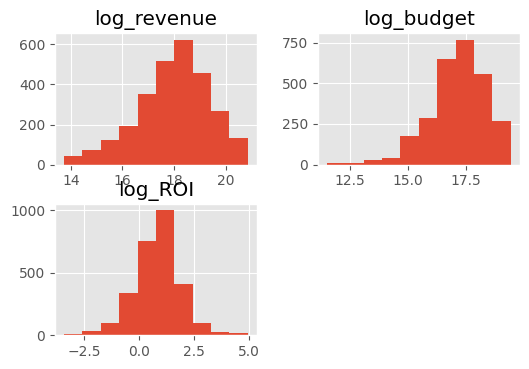

In [13]:
u_movie_df[['log_revenue', 'log_budget', 'log_ROI']].hist()
plt.show()

## 資料分析

### 票房分析

#### 一、疫情前後的票房差異


2019年底，全球疫情爆發，隨著八大場所的關閉，電影院的生意也因此大受打擊。時至今日，疫苗逐漸普及，疫情稍為緩和，我們想要知道「電影營收是否依舊受到影響」。我們假設2020/10/01（第四季）後的電影依舊受到疫情影響，以此假設分析：「2019/10/01 - 2019/12/31」與「2020/10/01 - 2020/12/31」的電影票房是否有差異。

In [14]:
covid_df = u_movie_df[((u_movie_df.release_date >= '2019-01-01'))]
covid_df_t1 = covid_df[((covid_df.release_date >= '2019-10-01') & (covid_df.release_date <= '2019-12-31'))]
covid_df_t2 = covid_df[((covid_df.release_date >= '2020-10-01'))]
covid_revenue = {'before_covid': covid_df_t1.revenue.dropna().reset_index().revenue,
                 'after_covid' : covid_df_t2.revenue.dropna().reset_index().revenue}
covid_df_revenue = pd.DataFrame(covid_revenue)
display(covid_df_revenue.head())
display(covid_df_revenue.tail())

before_covid  after_covid
0    1074251311    1070714.0
1     173469516   15104310.0
2     122801777  168285000.0
3     203044905   25814306.0
4     491570967   12886100.0

before_covid  after_covid
30      17133446          NaN
31      73515024          NaN
32     191540586          NaN
33      50401502          NaN
34     374733942          NaN

In [15]:
before = covid_df_revenue['before_covid'].dropna().values
after = covid_df_revenue['after_covid'].dropna().values

**檢查資料是否為常態分佈**

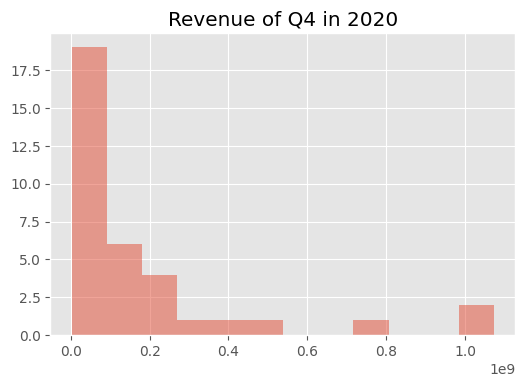

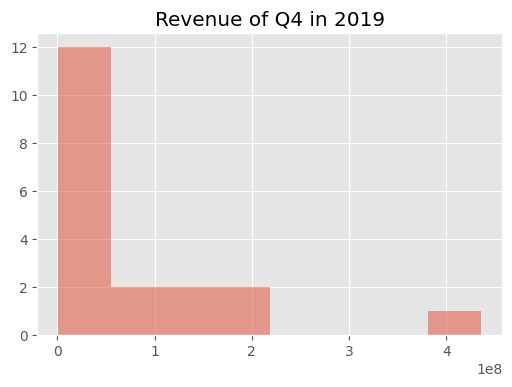

In [16]:
_ = plt.hist(before, bins = 'auto', alpha=0.5)
plt.title('Revenue of Q4 in 2020')
plt.show()

_ = plt.hist(after, bins = 'auto', alpha=0.5)
plt.title('Revenue of Q4 in 2019')
plt.show()

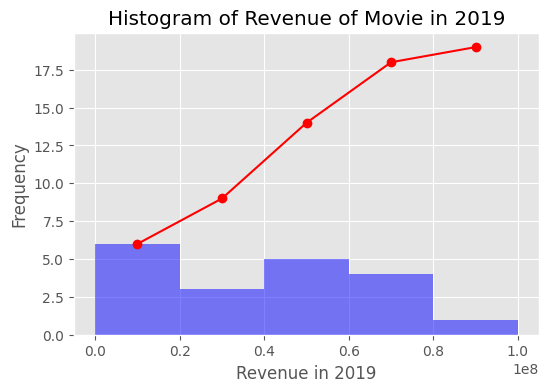

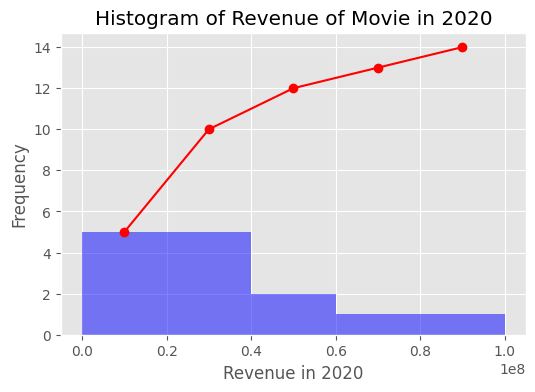

In [17]:
# the histogram of the data
bins_list = [0, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(before, bins=bins_list, density=False, facecolor='b', alpha=0.5)
plt.xlabel('Revenue in 2019')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue of Movie in 2019')
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

# the histogram of the data
bins_list = [0, 0.2e8, 0.4e8, 0.6e8, 0.8e8, 1e8]
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(after, bins=bins_list, density=False, facecolor='b', alpha=0.5)
plt.xlabel('Revenue in 2020')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue of Movie in 2020')
plt.grid(True)
plt.xticks(bins_list)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
ax.plot(bin_centers, counts.cumsum(), 'ro-')
plt.show()

由以上的長條圖，我們可以認定兩資料非常態分佈，因此使用 Wilcoxon Rank Sum Test。

+ $H_0:$ The locations of the two populations are the same. <br>
+ $H_1:$ The locations of before_covid(2019/10 - 2019/12) is greater than after_covid(2020/10 - 2020/12).

In [18]:
stats.mannwhitneyu(before , after , alternative = 'greater')

MannwhitneyuResult(statistic=447.0, pvalue=0.019465268036451523)

由檢定結果發現 p-value < 0.05，因此我們可以拒絕虛無假設，推論一直到2020/10第四季後的電影票房依然受到影響。若將信心水準調整至0.01，則會顯示沒有差異，因此我們認為電影票房一直到2020年底之後，就有回穩的趨勢。

我們接著拿 2020/07 - 2020/09 的資料與 2020/10 - 2020/12 比較，確認是否有回穩的趨勢。

In [19]:
covid_df_t1 =  covid_df[((covid_df.release_date >= '2020-07-01') & (covid_df.release_date <= '2020-09-30'))]
covid_df_t2 =  covid_df[((covid_df.release_date >= '2020-10-01'))]
covid_revenue = {'phase1': covid_df_t1.revenue.dropna().reset_index().revenue,
                 'phase2' : covid_df_t2.revenue.dropna().reset_index().revenue}
covid_df_revenue = pd.DataFrame(covid_revenue)
display(covid_df_revenue.head())
display(covid_df_revenue.tail())

phase1 = covid_df_revenue['phase1'].dropna().values
phase2 = covid_df_revenue['phase2'].dropna().values

phase1     phase2
0   39657073.0    1070714
1   39238300.0   15104310
2   47800000.0  168285000
3    4700000.0   25814306
4  363129000.0   12886100

phase1    phase2
14     NaN  47019435
15     NaN  30763855
16     NaN  76706000
17     NaN  80648577
18     NaN  46586903

+ $H_0:$ The locations of the two populations are the same. <br>
+ $H_1:$ The locations of phase1(2020/7 - 2020/9) is less than phase2(2020/10 - 2020/12).

In [20]:
stats.mannwhitneyu(phase1 , phase2 , alternative = 'less')

MannwhitneyuResult(statistic=80.0, pvalue=0.40285679813398884)

由檢定結果發現 p-value > 0.05，因此我們不可以拒絕虛無假設，推論一直到2020/10第四季後的電影票房相較於第三季已有好轉，不過因為疫情後之票房依然受到影響，因此接下來的分析，我們將去除疫情後的資料。

#### 二、票房與投入成本的關係

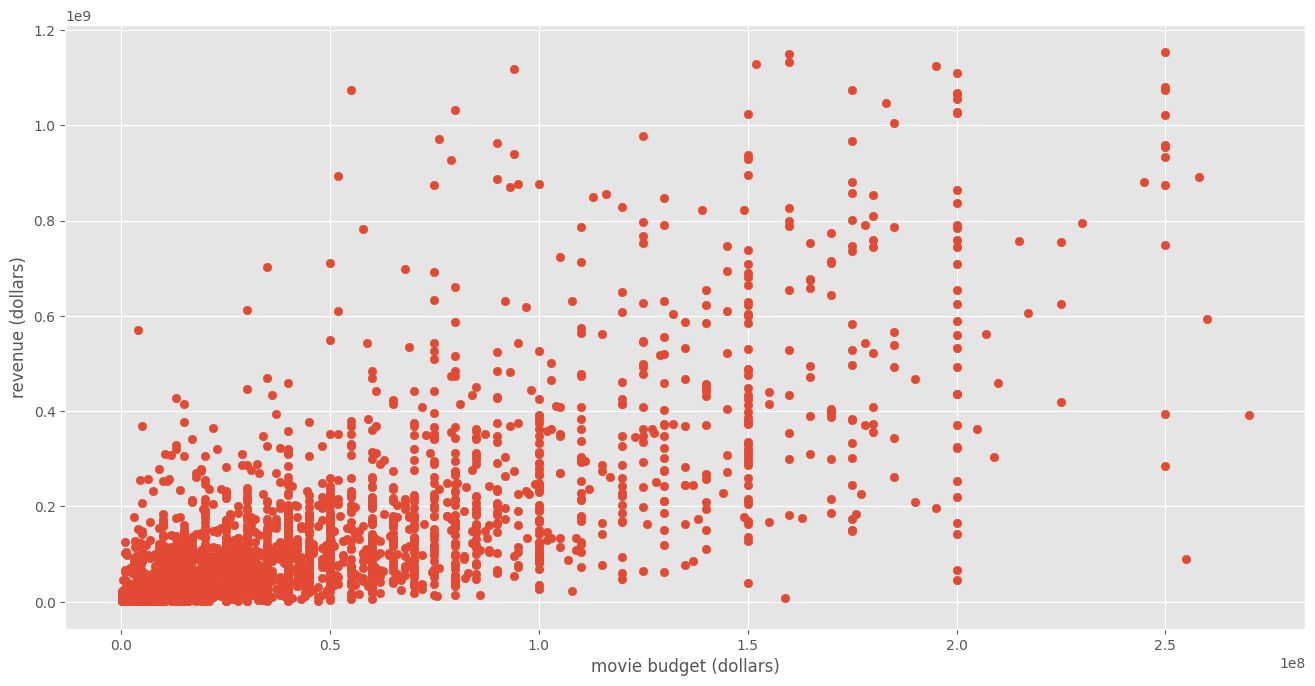

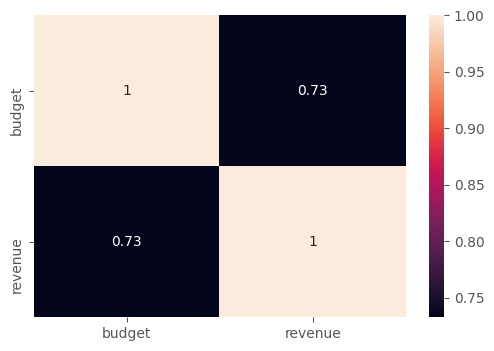

In [21]:
data_b_r = u_movie_df[['budget', 'revenue']]

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_b_r['budget'], data_b_r['revenue'])
ax.set_xlabel('movie budget (dollars)')
ax.set_ylabel('revenue (dollars)')
plt.show()

corr = data_b_r.corr()
_ = sns.heatmap(corr, annot=True)

從以上的散布圖我們可以看見具備一定程度的線性關係，我們使用 Pearson Correlation of Coefficient test 來驗證。

兩變數 budget, revenue 之間的關係為 $\rho$，當 $\rho = 0$ 時，代表選定的兩變數無關。

+ $H_0$: $\rho = 0$<br>
+ $H_1$: $\rho \neq  0$

In [22]:
stats.spearmanr(data_b_r['budget'], data_b_r['revenue'])

SpearmanrResult(correlation=0.7033468696684063, pvalue=0.0)

由檢定結果發現 p-value > 0.05，因此我們可以拒絕虛無假設，推測投入成本與票房相關。

#### 三、票房與參演者的關係 - 男女演員的多寡會不會影響票房

隨著性別平權議題、女權意識抬頭，越來越多人對於這樣的思潮越來越關注。2017年的#metoo運動，更是揭露了美國影視產業對於女性的種種不平等。以此為發想，我們希望可以探究：觀眾喜好是否有受到自19世紀後期開始的女權思潮影響。

<div class="alert alert-block alert-info">
<b>🍿 你知道嗎？</b><br>
    
在2007年到2012年間，有台詞的女性角色比例僅佔30.8%</div>

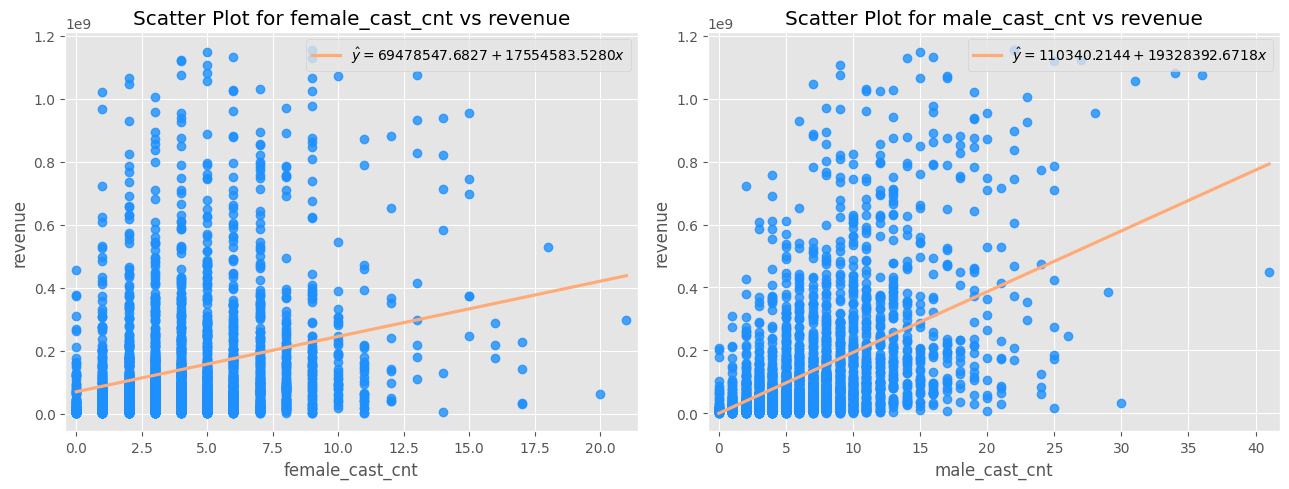

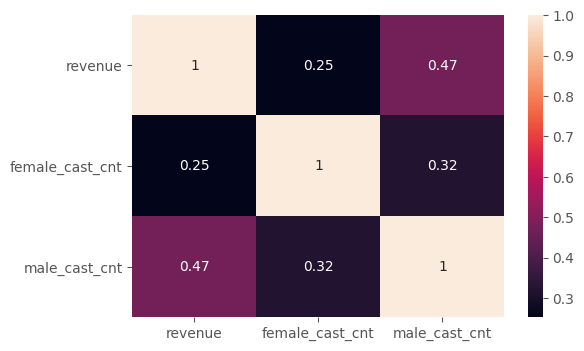

In [23]:
cast_gender = u_movie_df[['revenue', 'female_cast_cnt', 'male_cast_cnt']].copy()
cast_col = ['female_cast_cnt', 'male_cast_cnt']
mgt2001.model.multi_scatter_plot(1, 2, cast_gender, cast_col, 'revenue', figsize=(13, 5))

可以自散佈圖x軸線發現，男性演員數量明顯大於女性演員數量。然而這樣依然無法看出女性演員對於電影票房的影響力（演員數量多，投入成本相對較高，根據上一個檢定，票房也相對較高），因此我們決定探究：女性演員不少於男性演員的電影，票房是否較高。

In [24]:
cast_gender["diff"] = cast_gender["female_cast_cnt"] - cast_gender["male_cast_cnt"]
print(cast_gender)   

m = cast_gender['diff'] > 0
positive, negative = cast_gender[m], cast_gender[~m]

        revenue  female_cast_cnt  male_cast_cnt  diff
0     161834276                8             12    -4
1     144056873                4              3     1
2      45554533                1              5    -4
3      28780255                2             12   -10
4     106371651                5              5     0
...         ...              ...            ...   ...
2783   47019435                2             10    -8
2784   30763855                3              4    -1
2785   76706000                1             12   -11
2786   80648577                3             13   -10
2787   46586903                5              7    -2

[2788 rows x 4 columns]


$t$-test:

+ $H_0$: $\mu_1 - \mu_2 = 0$
+ $H_1$: $\mu_1 - \mu_2 < 0$.

其中，
+ $\mu_1$: average revenue that female cast count is greater than male cast count
+ $\mu_2$: average revenue that female cast count is smaller than male cast count

Check normality first:

1. 直方圖
2. Shapiro檢定<br>

+ $H_0$: The population is normally distributed
+ $H_1$: The population is not normally distributed

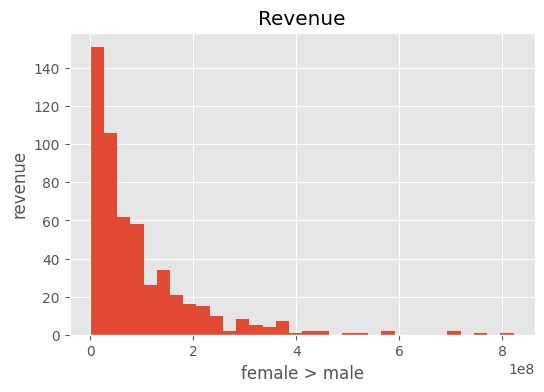

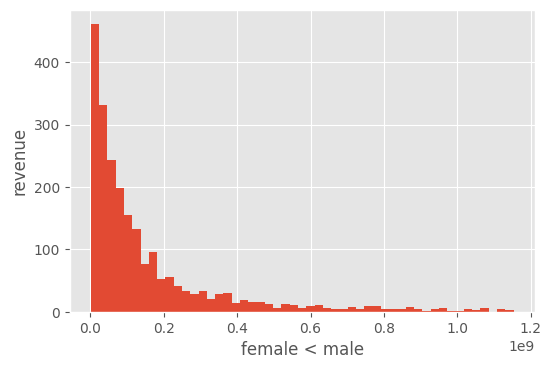

Sample 1:
ShapiroResult(statistic=0.7325308918952942, pvalue=1.691291852961973e-28)
Sample 2:
ShapiroResult(statistic=0.6975903511047363, pvalue=0.0)


In [25]:
# 轉換成numpy array
sample1 = positive['revenue'].values
sample2 = negative['revenue'].values

# 移除nan
sample1 = sample1[~np.isnan(sample1)]
sample2 = sample2[~np.isnan(sample2)]

#自由度計算
v1 = sample1.shape[0] - 1
v2 = sample2.shape[0] - 1

#畫histogram確認是否常態分佈
fig = plt.hist(sample1, bins = 'auto')
plt.title('Revenue')
plt.ylabel('revenue')
plt.xlabel("female > male")
plt.show()

fig = plt.hist(sample2, bins = 'auto')
plt.title('')
plt.ylabel('revenue')
plt.xlabel("female < male")
plt.show()

#Shapiro Test
print("Sample 1:")
print(stats.shapiro(sample1))
print("Sample 2:")
print(stats.shapiro(sample2))

根據上方的直方圖和 Shapiro 檢定結果 ($p$-value $< 0.05$，拒絕虛無假設），我們可以推測資料不是常態分佈。

因此，我們改使用 Wilcoxon Rank Sum test.

+ $H_0$: The two population locations are the same
+ $H_1$: The location of the population 1 is to the right of the location of population 2.

Populations:

+ population 1: average revenue that female cast count is greater than male cast count
+ population 2: average revenue that female cast count is smaller than male cast count

In [26]:
stats.ranksums(positive['revenue'], negative['revenue'])

RanksumsResult(statistic=-5.26309699662061, pvalue=1.4164879821151155e-07)

由上述檢定結果（p-vlaue < 0.05)，我們可以拒絕虛無假設，可以推論當女性演員數量大於男性演員數量時，票房較高。

#### 四、評分網站的差異：

##### 1. 影評人與大眾評分差異比較：

電影評分網站Rotten Tomato有許多評分機制，其中最受到矚目的兩個分別是「影評人的評分」與「大眾的評分」。以此為發想，我們比較Rotten Tomato上影評人與大眾的評分是否存在差異。 

In [27]:
df_compare_rating_1 = u_movie_df[['rotten_score', 'rotten_aud_score']].copy()
df_compare_rating_1 = df_compare_rating_1.dropna().reset_index()
print('Head of dataset:')
display(df_compare_rating_1.head())
print("Tail of dataset:")
display(df_compare_rating_1.tail())

Head of dataset:


index  rotten_score  rotten_aud_score
0      0          40.0              37.0
1      1          20.0              57.0
2      2          62.0              62.0
3      3          66.0              78.0
4      4          44.0              64.0

Tail of dataset:


index  rotten_score  rotten_aud_score
2405   2783          83.0              94.0
2406   2784          29.0              57.0
2407   2785          55.0              86.0
2408   2786          66.0              91.0
2409   2787          74.0              97.0

**檢查資料是否為常態分佈**

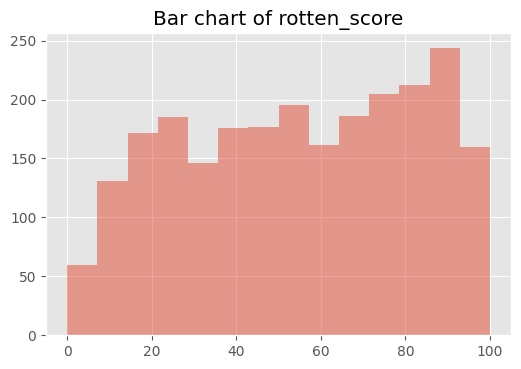

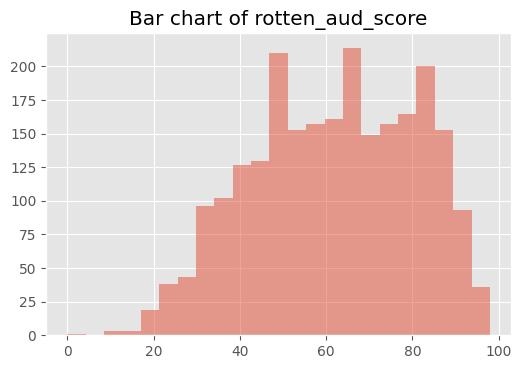

In [28]:
_ = plt.hist(df_compare_rating_1['rotten_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of rotten_score')
plt.show()

_ = plt.hist(df_compare_rating_1['rotten_aud_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of rotten_aud_score')
plt.show()

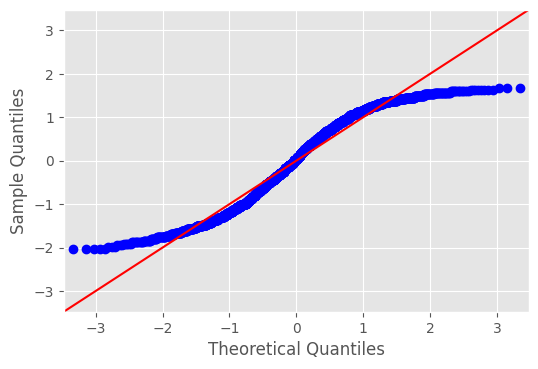

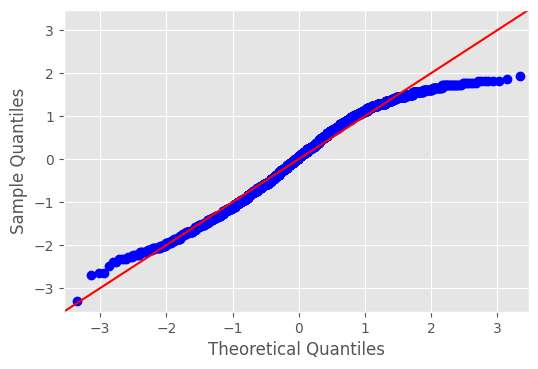

In [29]:
fig = sm.qqplot(df_compare_rating_1['rotten_score'], stats.norm, fit=True, line='45')
fig = sm.qqplot(df_compare_rating_1['rotten_aud_score'], stats.norm, fit=True, line='45')

從直方圖和 Shapiro test 之後，我們認定 rotten_score 為非常態分佈，rotten_aud_score 為常態分佈，因此採用 Wilcoxon Signed Rank Sum Test.

+ $H_0:$ The two population locations are the same
+ $H_1:$ The two population locations are NOT the same

In [30]:
stats.wilcoxon(df_compare_rating_1['rotten_score'], df_compare_rating_1['rotten_aud_score'], alternative='two-sided')

WilcoxonResult(statistic=875752.5, pvalue=1.4523706162642633e-55)

由檢定結果發現 p-value < 0.05，因此我們可以拒絕虛無假設，推論專業影評人與觀眾評分不盡相同。

##### 2.不同平台間觀眾評分比較: TMDb vs Rotten Tomato

我們好奇針對同一部電影在不同平台上的觀眾評分是否有差異，因此比較爛番茄觀眾評分及TMDb上的觀眾評分結果是否相同。

In [31]:
df_compare_rating_2 = u_movie_df[['TMDB_score','rotten_aud_score']].copy()
df_compare_rating_2 = df_compare_rating_2.dropna().reset_index()
df_compare_rating_2['TMDB_score'] = df_compare_rating_2['TMDB_score']*10 
print('Head of dataset:')
display(df_compare_rating_2.head())
print("Tail of dataset:")
display(df_compare_rating_2.tail())

Head of dataset:


index  TMDB_score  rotten_aud_score
0      0        59.0              37.0
1      1        64.0              57.0
2      2        65.0              62.0
3      3        67.0              78.0
4      4        64.0              64.0

Tail of dataset:


index  TMDB_score  rotten_aud_score
2405   2783        85.0              94.0
2406   2784        71.0              57.0
2407   2785        76.0              86.0
2408   2786        79.0              91.0
2409   2787        88.0              97.0

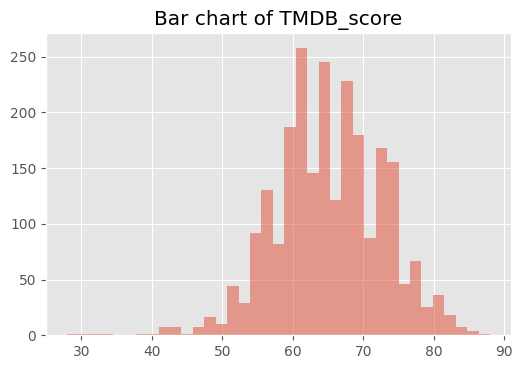

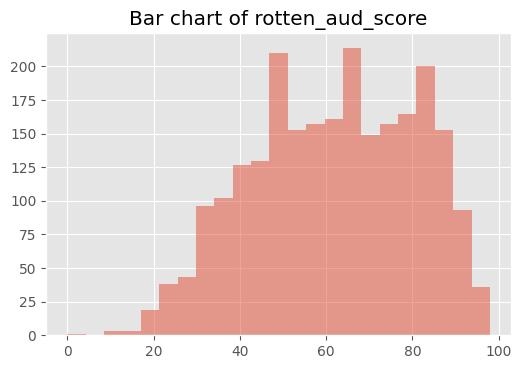

In [32]:
_ = plt.hist(df_compare_rating_2['TMDB_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of TMDB_score')
plt.show()

_ = plt.hist(df_compare_rating_2['rotten_aud_score'], bins = 'auto', alpha=0.5)
plt.title('Bar chart of rotten_aud_score')
plt.show()

從長條圖我們認定兩組資料為常態分佈。

Let 'TMDB_score' be $\mu_1$, 'rotten_aud_score' be $\mu_2$, and $\mu_D = \mu_1 - \mu_2$.

+ $H_0$: $\mu_D = 0$
+ $H_1$: $\mu_D \ne 0$

In [33]:
alpha = 0.05
# use matched-pair experiment
# t-test & estimator of mu_D
rotten = df_compare_rating_2['TMDB_score'].values
aud = df_compare_rating_2['rotten_aud_score'].values

diff = rotten - aud
nobs = diff.shape[0]
df = nobs - 1
print("degree of freedom = ", df)

diff_desc = stats.describe(diff)
t_value = (diff_desc.mean - 0) / (diff_desc.variance ** 0.5) * (nobs ** 0.5)
print(f"t-value = {t_value:.4f}")

#p-values
ptmp = stats.t.cdf(t_value, df)
p_value = 2 * (1 - ptmp)
print(f"p_value (two tail) = {p_value:.4f}")

degree of freedom =  2409
t-value = 13.2406
p_value (two tail) = 0.0000


由檢定結果發現 $p$-value < 0.05，因此我們可以拒絕虛無假設，推論 TMDb 和 Rotten Tomatoes 兩者評分不盡相同。

##### 3. 觀眾評分與電影類別的關係

我們認為觀眾評分時，不只會考量電影作品本身的內容，也有可能因為電影類別而有所偏頗，導致特定類別的電影評分較高或較低。

In [34]:
movie_gen_dummy = pd.read_csv('../data/movie_gen_dummy.csv', index_col=0)
movie_gen_dummy.dropna(inplace=True)

rev_outlier = mgt2001.des.outlier(movie_gen_dummy['revenue'].dropna(), show=False)[0][:20]
rot_outlier = mgt2001.des.outlier(movie_gen_dummy['rotten_aud_score'].dropna(), show=False)[0]

def filter_rows_by_values(df, col, values):
    return df[df[col].isin(values) == False]

movie_gen_dummy = movie_gen_dummy[movie_gen_dummy['revenue'] >= 1e5*9] 
movie_gen_dummy = filter_rows_by_values(movie_gen_dummy, 'revenue', rev_outlier).reset_index(drop=True)
movie_gen_dummy = filter_rows_by_values(movie_gen_dummy, 'rotten_aud_score', rot_outlier).reset_index(drop=True)
print(movie_gen_dummy.shape)

movie_gen_df = movie_gen_dummy.copy()
movie_gen_df = movie_gen_df.loc[:, 'Action':]
movie_gen_df['rotten_aud_score'] = movie_gen_dummy['rotten_aud_score']
movie_gen_df['revenue'] = movie_gen_dummy['revenue']
movie_gen_df['release_date'] = movie_gen_dummy['release_date']
movie_gen_df['t'] = movie_gen_df.index
movie_gen_df.head()

(2416, 28)


Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0       0          0          0       0      0            0      0       0   
1       0          1          0       0      0            0      1       0   
2       0          0          1       1      0            0      0       1   
3       0          0          0       0      1            0      1       0   
4       0          0          0       1      1            0      0       0   

   Fantasy  History  ...  Romance  Science Fiction  TV Movie  Thriller  War  \
0        0        0  ...        0                0         0         0    0   
1        0        0  ...        1                0         0         1    0   
2        0        0  ...        0                0         0         0    0   
3        0        0  ...        0                0         0         1    0   
4        0        0  ...        0                0         0         0    0   

   Western  rotten_aud_score    revenue  release_date  t  
0        0              37.0  161834276    2000-02-03  0  
1        0              57.0  144056873    2000-02-03  1  
2        0              62.0   45554533    2000-02-11  2  
3        0              78.0   28780255    2000-02-18  3  
4        0              64.0  106371651    2000-02-18  4  

[5 rows x 23 columns]

In [35]:
x_names = list(movie_gen_df.columns[:-4])
y_name = 'rotten_aud_score'

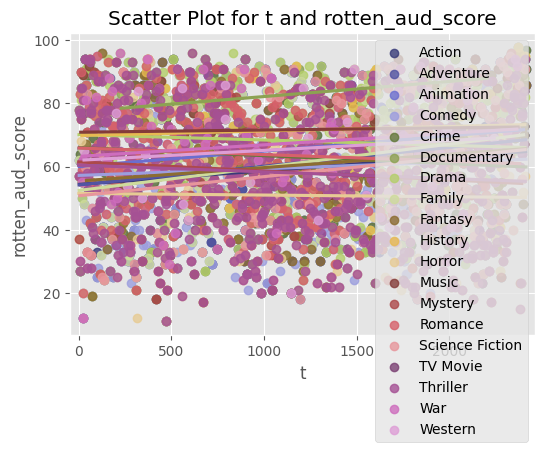

In [36]:
mgt2001.model.multi_variable_plot(x_name='t', y_name=y_name, df=movie_gen_df, x_names=x_names)

In [37]:
np.sum(movie_gen_df)

Action                                                            742
Adventure                                                         548
Animation                                                         187
Comedy                                                            883
Crime                                                             389
Documentary                                                        11
Drama                                                            1028
Family                                                            322
Fantasy                                                           309
History                                                           111
Horror                                                            288
Music                                                              63
Mystery                                                           234
Romance                                                           399
Science Fiction     

我們可以發現去掉 outliers 之後，TV Movie 變得都沒有值，於是我們先將 TV Movie 從我們的 $x$ 變數去除。

In [38]:
x_names.remove('TV Movie')

In [39]:
mgt2001.model.multicollinearity(movie_gen_df, x_names, y_name)

In [40]:
res_dict, assessment = mgt2001.model.MultipleRegression(x_names=x_names, y_name=y_name, df=movie_gen_df, assessment=False, t_test_c=0, t_test_option='two-tail')

                            OLS Regression Results                            
Dep. Variable:       rotten_aud_score   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     24.90
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           2.62e-76
Time:                        16:03:48   Log-Likelihood:                -10306.
No. Observations:                2416   AIC:                         2.065e+04
Df Residuals:                    2397   BIC:                         2.076e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              62.7840      1.139     

Romance 和 War 在這裏發生了多元共線性的問題，所以我們將他們去除。

In [41]:
x_names.remove('Romance')
x_names.remove('War')

In [42]:
res_dict, assessment = mgt2001.model.MultipleRegression(x_names=x_names, 
                                                        y_name=y_name, 
                                                        df=movie_gen_df, 
                                                        assessment=False, 
                                                        t_test_c=0, 
                                                        t_test_option='two-tail')

                            OLS Regression Results                            
Dep. Variable:       rotten_aud_score   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     27.92
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.92e-77
Time:                        16:03:48   Log-Likelihood:                -10307.
No. Observations:                2416   AIC:                         2.065e+04
Df Residuals:                    2399   BIC:                         2.075e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              62.4301      1.101     

由上述結果可知，在 2416 筆資料當中，Documentary 僅有 11 筆、Music 僅有 56 筆，若排除此二資料筆數較少之類別，可從我們所得到的 model 中的係數結果得知，若電影類別為 Drama 或 Animation，整體而言可獲得較高觀眾評分。

#### 五、票房與原始語言的關係

一部電影之原始語言通常會進而影響其風格以及目標客群，希望可以透過此分析探討若該電影之原始語言為世界上較多人口使用之語言，像是英文，會不會因為較多人聽得懂原版而廣泛流傳、進而提升票房。抑或是有特定語言之電影之票房特別突出。

In [43]:
language_df = u_movie_df[['original_language', 'revenue']].copy()
print("Head of data set:\n")
display(language_df.head())
print("Tail of data set:\n")
display(language_df.tail())

Head of data set:



original_language    revenue
0                en  161834276
1                en  144056873
2                en   45554533
3                en   28780255
4                en  106371651

Tail of data set:



original_language   revenue
2783                en  47019435
2784                en  30763855
2785                en  76706000
2786                en  80648577
2787                en  46586903

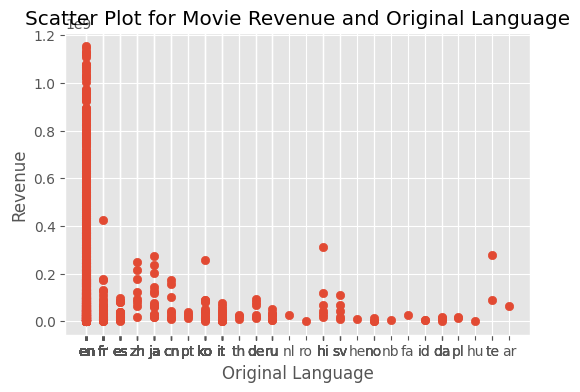

In [44]:
plt.scatter(language_df['original_language'], language_df['revenue'])
plt.title('Scatter Plot for Movie Revenue and Original Language')
plt.xlabel('Original Language')
plt.ylabel('Revenue')
plt.xticks(language_df['original_language'])
plt.show()

**檢查資料是否為常態分佈**

考量到部分語言電影之資料筆數 < 3 、無法進行 Shapiro Wilk's Test，且資料筆數少較難真實呈現該語言電影的真實票房，故先將其予以排除

In [45]:
three_bound_index = list(language_df.groupby('original_language').count()[language_df.groupby('original_language').count()['revenue'] >= 3].index)
proper_lang_df = language_df[language_df['original_language'].apply(lambda x: x in three_bound_index)]
proper_lang_df

original_language    revenue
0                   en  161834276
1                   en  144056873
2                   en   45554533
3                   en   28780255
4                   en  106371651
...                ...        ...
2783                en   47019435
2784                en   30763855
2785                en   76706000
2786                en   80648577
2787                en   46586903

[2775 rows x 2 columns]

+ $H_0$: The population is normally distributed
+ $H_1$: The population is not normally distributed

In [46]:
treatment_name_list = proper_lang_df['original_language'].unique()
print(treatment_name_list)
anova.shapiro(proper_lang_df, treatment_name_list, 'original_language', 'revenue')
# anova.qq_plot(4, 4, proper_lang_df, treatment_name_list, 'original_language', 'revenue', figsize=(16, 16))

['en' 'fr' 'es' 'zh' 'ja' 'cn' 'pt' 'ko' 'it' 'th' 'de' 'ru' 'hi' 'sv'
 'no' 'da']
1: Statistics=0.6985, p=0.0000
2: Statistics=0.5459, p=0.0000
3: Statistics=0.8304, p=0.0002
4: Statistics=0.9592, p=0.8025
5: Statistics=0.8486, p=0.0102
6: Statistics=0.8343, p=0.0658
7: Statistics=0.9684, p=0.8313
8: Statistics=0.7001, p=0.0001
9: Statistics=0.7924, p=0.0012
10: Statistics=0.9832, p=0.7520
11: Statistics=0.8692, p=0.2231
12: Statistics=0.9471, p=0.7028
13: Statistics=0.7717, p=0.0322
14: Statistics=0.9276, p=0.5803
15: Statistics=0.7951, p=0.1030
16: Statistics=0.9850, p=0.9307


雖然沒有符合 Required Conditions，因為難以比較，所以仍透過 One Way ANOVA 來幫助我們釐清關係。

+ $H_0$: All population means are equal<br>
+ $H_1$: Not all population means are equal

In [47]:
results, aov_table, render_table, f_stat, p_value = anova.f_oneway(proper_lang_df, 'original_language', 'revenue')
display(aov_table)
print(f"p-value = {p_value:.4f}")

p-value: 1.866833379796334e-07


sum_sq      df         F        PR(>F)
C(original_language)  2.167251e+18    15.0  4.085807  1.866833e-07
Residual              9.756450e+19  2759.0       NaN           NaN

p-value = 0.0000


In [48]:
mc = smm.MultiComparison(proper_lang_df['revenue'], proper_lang_df['original_language'])
print(mc.tukeyhsd().summary())

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------
    cn     da     -58777230.5    0.9 -453692911.9816 336138450.9816  False
    cn     de  -19386488.1667    0.9   -367669382.18 328896405.8467  False
    cn     en   80979545.5313    0.9 -147379587.0194  309338678.082  False
    cn     es  -38049257.6667    0.9 -294660053.0628 218561537.7294  False
    cn     fr  -29759843.6912    0.9 -270803713.8388 211284026.4564  False
    cn     hi      28994122.0    0.9 -319288772.0133 377277016.0133  False
    cn     it  -48362190.1111    0.9 -322389705.7099 225665325.4877  False
    cn     ja   24160919.0588    0.9 -252335362.7657 300657200.8834  False
    cn     ko  -17565548.1765    0.9  -294061830.001 258930733.6481  False
    cn     no  -63470572.6667    0.9 -500066285.7674  373125140.434  False
    cn     pt     -430556

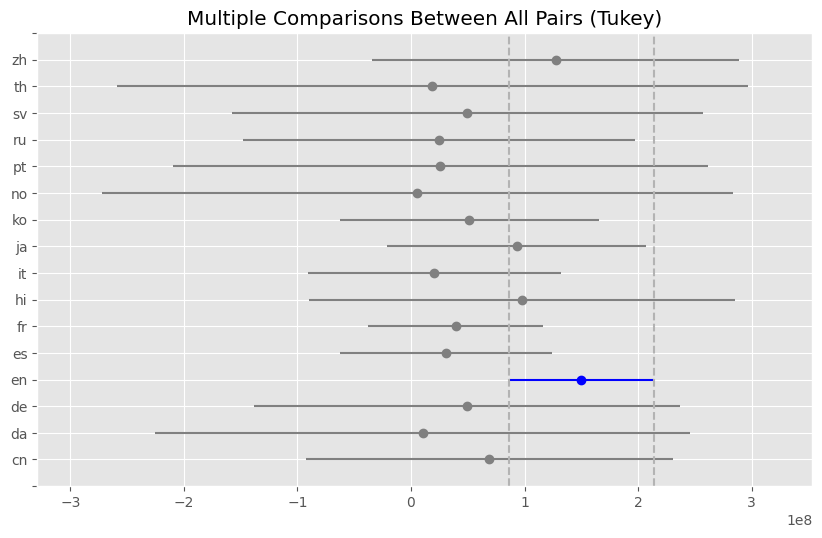

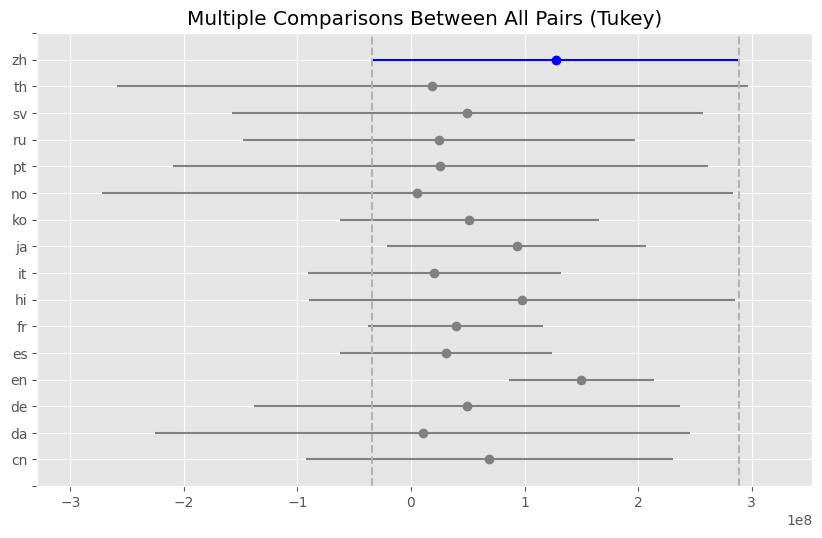

In [49]:
_ = mc.tukeyhsd().plot_simultaneous(comparison_name = "en")
_ = mc.tukeyhsd().plot_simultaneous(comparison_name = "zh")

Pairs `en` and `es`, `en` and `fr`, `en` and `it` can reject the null hypothesis under 5% confidence level. Moreover, by observing the graph above, we can know that the mean of `en` is larger than the mean of `es`, `fr`, `it`.

結果顯示原始語言為英文的電影票房較西班牙語、法語、義大利語電影好的狀況，不過因為整體資料筆數太懸殊、幾乎都是英文片所以意義不大。

為更了解各原始語言電影之票房分佈，繪製以下 Box Plot。

In [50]:
lan_list = proper_lang_df['original_language'].unique()

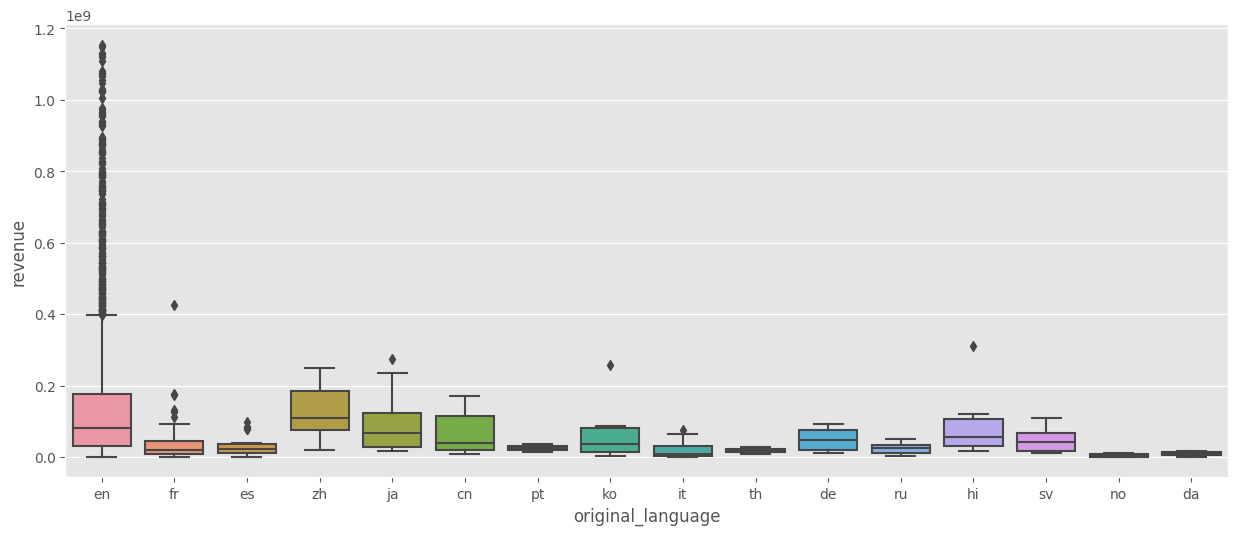

In [51]:
fig = plt.figure(figsize=(15, 6))
ax = sns.boxplot(x='original_language', y="revenue", data=proper_lang_df)
plt.show()

在這裏我們也可以看到，中文電影的平均票房表現其實也不差。甚至高於英文電影的平均票房。

#### 六、票房與電影級數的關係

因不同電影分級也代表該電影的客群範圍大小不盡相同，因此我們想探討電影分級是否會影響票房。

In [52]:
data7 = u_movie_df[['revenue', 'rating']]
print('Head of dataset:')
display(data7.head())

print("Tail of dataset:")
display(data7.tail())

print(data7.shape)

Head of dataset:


revenue rating
0  161834276      R
1  144056873      R
2   45554533      G
3   28780255      R
4  106371651      R

Tail of dataset:


revenue rating
2783  47019435      R
2784  30763855  PG-13
2785  76706000      R
2786  80648577      R
2787  46586903  PG-13

(2788, 2)


去除NaN值：

In [53]:
data7 = data7[~pd.isnull(data7['rating'])].reset_index(drop=True)
print(data7.shape)

(2361, 2)


In [54]:
rating = data7['rating'].unique()
n = len(rating)
print(n, rating)

7 ['R' 'G' 'PG-13' 'PG' 'TVG' 'NC-17' 'TVMA']


分級共有7種，將其編號 1~7

**Scatter Plot**

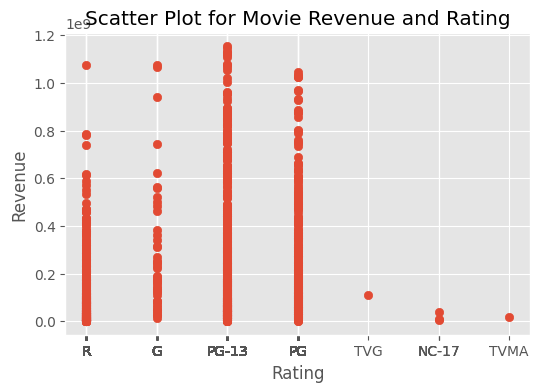

In [55]:
plt.scatter(data7['rating'], data7['revenue'])
plt.title('Scatter Plot for Movie Revenue and Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue')
plt.xticks(data7['rating'])
plt.show()

可以看到NC-17、TVG、TVMA的資料筆數很少。

**用各分級平均票房畫 Bar Chart**

In [56]:
rate_ave = []

for i in range(n):
    rate_ave.append(data7['revenue'][data7['rating'] == rating[i]].mean())
    
print(rate_ave)

[87707908.30050762, 288900688.45652175, 189863192.0979592, 231950381.4115942, 110230332.0, 18113892.666666668, 15600000.0]


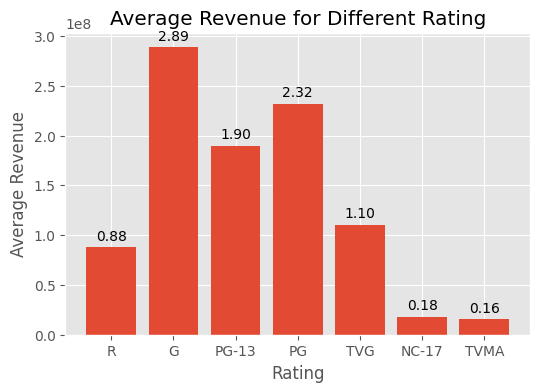

In [57]:
fig, ax = plt.subplots()
rects1 = ax.bar(rating, rate_ave, width=0.8, bottom=None, align='center')
plt.ylabel('Average Revenue')
plt.xlabel('Rating')
plt.title('Average Revenue for Different Rating')
plt.xticks(rating)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = (rect.get_height())
        plt.annotate('{:.2f}'.format(height / 1e8),
                    xy = (rect.get_x() + rect.get_width() / 2, height),
                    xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')

autolabel(rects1)
plt.show()

In [58]:
data7.groupby(['rating']).describe()

revenue                                                         \
         count          mean           std          min           25%   
rating                                                                  
G         46.0  2.889007e+08  2.658467e+08   14460000.0  1.130379e+08   
NC-17      3.0  1.811389e+07  1.943852e+07    3909002.0  7.037348e+06   
PG       345.0  2.319504e+08  2.325721e+08    1117920.0  7.202875e+07   
PG-13    980.0  1.898632e+08  2.263727e+08     970816.0  4.568520e+07   
R        985.0  8.770791e+07  1.069241e+08     924793.0  2.115026e+07   
TVG        1.0  1.102303e+08           NaN  110230332.0  1.102303e+08   
TVMA       1.0  1.560000e+07           NaN   15600000.0  1.560000e+07   

                                                
                50%          75%           max  
rating                                          
G       186662101.5  378496892.0  1.073395e+09  
NC-17    10165694.0   25216338.0  4.026698e+07  
PG      141702264.0  321885765.0  1.047612e+09  
PG-13    99743505.0  228840672.0  1.153296e+09  
R        54700105.0  109502303.0  1.074251e+09  
TVG     110230332.0  110230332.0  1.102303e+08  
TVMA     15600000.0   15600000.0  1.560000e+07

※資料筆數差異很大，不考慮NC-17、TVG、TVMA  


G 的票房看起來最高，R 的票房看起來最低，進一步檢定是否如此。

In [59]:
rating = np.delete(rating, [4, 5, 6])
n = len(rating)
print(n, rating)

4 ['R' 'G' 'PG-13' 'PG']


將分級編號為1~4。

In [60]:
data7 = data7[data7['rating'] != 'NC-17'].reset_index(drop=True)
data7 = data7[data7['rating'] != 'TVG'].reset_index(drop=True)
data7 = data7[data7['rating'] != 'TVMA'].reset_index(drop=True)
print(data7.shape)

(2356, 2)


**Check Normality**

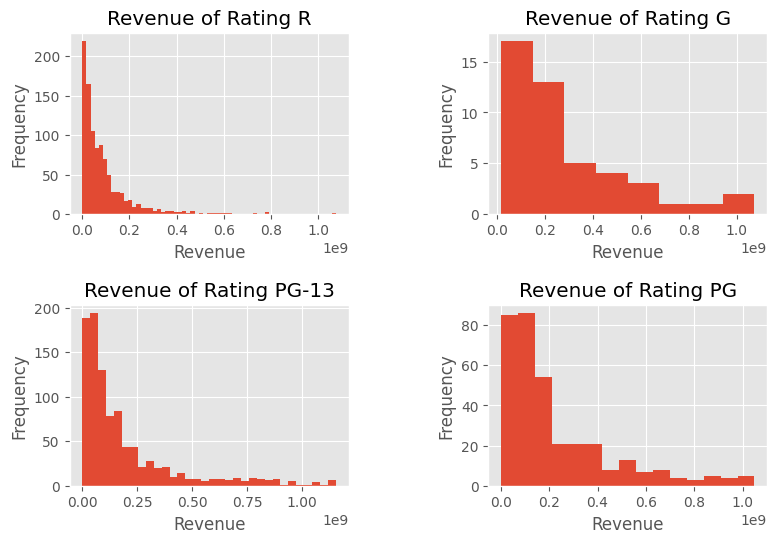

In [61]:
fig = plt.figure(figsize = (9, 6))
row, col = 2, 2
fig.subplots_adjust(hspace = 0.5, wspace = 0.5)

for i in range(n):
    ax = fig.add_subplot(row, col, i + 1)
    ax = data7['revenue'][data7['rating'] == rating[i]].hist(bins = 'auto')
    plt.title('Revenue of Rating ' + rating[i])
    plt.ylabel('Frequency')
    plt.xlabel('Revenue')
    
plt.show()

明顯看得出來資料不是常態分佈，因此使用無母數檢定的Kruskal-Wallis Test。

**Kruskal-Wallis Test**

+ $H_0:$ The locations of all the 9 populations are the same.  
+ $H_1:$ At least two population locations differ.  

Significance level $\alpha = 0.05$.

In [62]:
stats.kruskal(data7['revenue'][data7['rating'] == 'PG-13'], data7['revenue'][data7['rating'] == 'R'], 
              data7['revenue'][data7['rating'] == 'G'], data7['revenue'][data7['rating'] == 'PG'])

KruskalResult(statistic=283.22241140429986, pvalue=4.2517137942222856e-61)

$p$-value $< 0.05$, which means at least two population locations differ.  
表示不同電影分級的票房有差異，進一步將電影分級兩兩分組，以Mann–Whitney U Test檢定其之間的關係。

**Mann–Whitney U Test**

In [63]:
rate_comb = list(itertools.combinations(rating, 2))
print(rate_comb)

[('R', 'G'), ('R', 'PG-13'), ('R', 'PG'), ('G', 'PG-13'), ('G', 'PG'), ('PG-13', 'PG')]


用來儲存結果的二維陣列

In [64]:
rate_comb_result = []

for m1 in range(n):
    rate_comb_result.append([])
    for m2 in range(n):
        rate_comb_result[m1].append([])

+ $H_0:$ The two population locations are the same in terms of revenue.  
+ $H_1:$ The two population locations are not the same in terms of revenue.

只印出可以 reject $H_0$ 的月份組合

In [65]:
diff_rate = [] #r1 != r2
for (r1, r2) in rate_comb:
    #print('(', r1, ', ', r2, ')')
    try:
        result = stats.mannwhitneyu(data7['revenue'][data7['rating'] == r1], data7['revenue'][data7['rating'] == r2], alternative = 'two-sided')
        if result.pvalue < 0.05:
            print('(', r1, ' != ', r2, '): ', result, sep = '')
            diff_rate.append((r1, r2))
            rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '!='
            rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '!='
        else:
            rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '='
            rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '='
    except ValueError:
        continue
    
print(diff_rate)

(R != G): MannwhitneyuResult(statistic=8566.0, pvalue=9.535788534005027e-13)
(R != PG-13): MannwhitneyuResult(statistic=322207.0, pvalue=2.8085095054408475e-37)
(R != PG): MannwhitneyuResult(statistic=85354.0, pvalue=3.7048787546911424e-43)
(G != PG-13): MannwhitneyuResult(statistic=29542.0, pvalue=0.0003644829113218024)
(PG-13 != PG): MannwhitneyuResult(statistic=140824.0, pvalue=3.8777413935328725e-06)
[('R', 'G'), ('R', 'PG-13'), ('R', 'PG'), ('G', 'PG-13'), ('PG-13', 'PG')]


針對以上這些月份再做left tail和right tail

In [66]:
less_rate = [] #r1 < r2
greater_rate = [] #r1 > r2
for (r1, r2) in diff_rate:
    l_result = stats.mannwhitneyu(data7['revenue'][data7['rating'] == r1], data7['revenue'][data7['rating'] == r2], alternative = 'less')
    r_result = stats.mannwhitneyu(data7['revenue'][data7['rating'] == r1], data7['revenue'][data7['rating'] == r2], alternative = 'greater')
    if l_result.pvalue < 0.05:
        print('(', r1, ' < ', r2, '): ', l_result, sep = '')
        less_rate.append((r1, r2))
        rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '<'
        rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '>'
    elif r_result.pvalue < 0.05:
        print('(', r1, ' > ', r2, '): ', r_result, sep = '')
        greater_rate.append((r1, r2))
        rate_comb_result[np.where(rating == r1)[0][0]][np.where(rating == r2)[0][0]] = '>'
        rate_comb_result[np.where(rating == r2)[0][0]][np.where(rating == r1)[0][0]] = '<'
        
print(less_rate)
print(greater_rate)

(R < G): MannwhitneyuResult(statistic=8566.0, pvalue=4.767894267002514e-13)
(R < PG-13): MannwhitneyuResult(statistic=322207.0, pvalue=1.4042547527204237e-37)
(R < PG): MannwhitneyuResult(statistic=85354.0, pvalue=1.8524393773455712e-43)
(G > PG-13): MannwhitneyuResult(statistic=29542.0, pvalue=0.0001822414556609012)
(PG-13 < PG): MannwhitneyuResult(statistic=140824.0, pvalue=1.9388706967664363e-06)
[('R', 'G'), ('R', 'PG-13'), ('R', 'PG'), ('PG-13', 'PG')]
[('G', 'PG-13')]


In [67]:
for i in range(n):
    print(rating[i], rate_comb_result[i])

R [[], '<', '<', '<']
G ['>', [], '>', '=']
PG-13 ['>', '<', [], '<']
PG ['>', '=', '>', []]


**小結：**  

G 和 PG 的票房大於所有其他電影分級，再來是 PG-13，R的票房最低。  
G 和 PG 兩者彼此差不多，很合理，因為這兩個都算普遍級，但 PG 是建議家長指導。  
而 PG-13 能看的人數比R多，票房較高也合理。

#### 七、票房與上映時間的關係

##### 1. 寒暑假比較多電影？

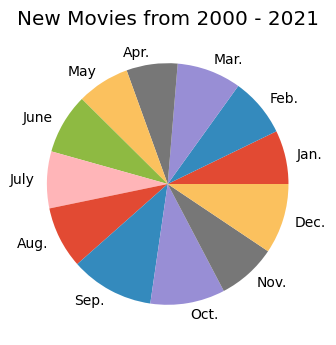

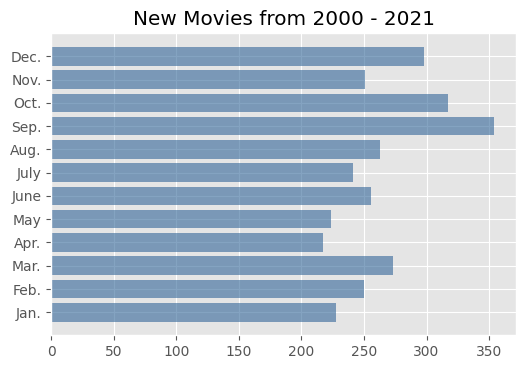

In [68]:
month = 0
vacay = 0

y = np.array([228, 250, 273, 217, 224, 256, 241, 263, 354, 317, 251, 298])
x = np.array(['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
mylabels = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.']

plt.pie(y, labels = mylabels)
plt.title("New Movies from 2000 - 2021")
plt.show() 

plt.barh(x, y, color=(0.2, 0.4, 0.6, 0.6))
plt.title("New Movies from 2000 - 2021")
plt.show()

In [69]:
y = np.array([[2000, 0, 8, 10, 8, 8, 9, 8, 9, 6, 6, 8, 13], [2001, 7, 4, 5, 9, 6, 11, 16, 9, 4, 12, 9, 13], [2002,8, 12, 11, 8, 7, 9, 10, 7, 5, 12, 5, 15], \
             [2003, 9, 8, 11, 8, 13, 7, 9, 11, 13, 8, 11, 11], [2004, 7, 11, 10, 13, 9, 12, 9, 7, 14, 14, 10, 11], [2005, 12, 8, 9, 10, 7, 12, 9, 11, 25, 16, 12, 12], \
             [2006, 12, 11, 20, 7, 9, 13, 14, 14, 20, 12, 10, 19], [2007, 5, 13, 14, 9, 8, 17, 8, 14, 20, 15, 16, 14], [2008, 15, 16, 6, 11, 9, 9, 15, 15, 18, 17, 10, 16], \
             [2009, 11, 14, 18, 12, 11, 18, 11, 12, 24, 22, 15, 12], [2010, 10, 14, 18, 12, 10, 18, 13, 14, 23, 17, 15, 12],  [2011, 9, 15, 15, 13, 13, 10, 14, 17, 27, 18, 15, 13], \
             [2012, 15, 9, 20, 13, 12, 13, 7, 19, 24, 10, 10, 10], [2013, 17, 10, 15, 15, 15, 12, 20, 15, 23, 21, 12, 17], [2014, 15, 15, 16, 16, 19, 10, 11, 16, 17, 25, 11, 24], \
             [2015, 15, 10, 11, 12, 14, 14, 17, 13, 18, 22, 15, 16], [2016,14, 20, 15, 15, 14, 19, 15, 12, 20, 14, 25, 20], [2017, 13, 16, 20, 7, 11, 18, 11, 14, 19, 20, 10, 15], \
             [2018, 11, 15, 11, 9, 13, 12, 12, 16, 17, 17, 15, 17], [2019, 10, 8, 11, 7, 13, 10, 6, 13, 13, 15, 13, 13], [2020, 10, 7, 2, 1, 0, 3, 6, 5, 4, 4, 4, 5], [2021, 3, 6, 5, 2, 3, None, None, None, None, None, None, None]])
month_df = pd.DataFrame(y, columns = ["Years",'Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sep.', 'Oct.', 'Nov.', 'Dec.'])
display(month_df)
y_2 = np.array([[2000, 30, 63], [2001, 38, 67], [2002, 32, 77], [2003, 31, 88], [2004, 27, 100], [2005, 32, 111], [2006, 47, 114],\
       [2007, 36, 117], [2008, 51, 106], [2009, 35, 145], [2010, 39, 137], [2011, 44, 135], [2012, 36, 126], [2013, 52, 140],\
       [2014, 51, 144], [2015, 46, 131], [2016, 47, 156], [2017, 40, 134], [2018, 45, 120], [2019, 32, 100]])#, [2020, 16, 35]])
vacay_df = pd.DataFrame(y_2, columns = ['Years', '12, 7, 8', 'rest'])

vacay_df['sum'] = vacay_df['12, 7, 8'] + vacay_df['rest']
display(vacay_df)

Years Jan. Feb. Mar. Apr. May  June  July  Aug.  Sep.  Oct.  Nov.  Dec.
0   2000    0    8   10    8   8     9     8     9     6     6     8    13
1   2001    7    4    5    9   6    11    16     9     4    12     9    13
2   2002    8   12   11    8   7     9    10     7     5    12     5    15
3   2003    9    8   11    8  13     7     9    11    13     8    11    11
4   2004    7   11   10   13   9    12     9     7    14    14    10    11
5   2005   12    8    9   10   7    12     9    11    25    16    12    12
6   2006   12   11   20    7   9    13    14    14    20    12    10    19
7   2007    5   13   14    9   8    17     8    14    20    15    16    14
8   2008   15   16    6   11   9     9    15    15    18    17    10    16
9   2009   11   14   18   12  11    18    11    12    24    22    15    12
10  2010   10   14   18   12  10    18    13    14    23    17    15    12
11  2011    9   15   15   13  13    10    14    17    27    18    15    13
12  2012   15    9   20   13  12    13     7    19    24    10    10    10
13  2013   17   10   15   15  15    12    20    15    23    21    12    17
14  2014   15   15   16   16  19    10    11    16    17    25    11    24
15  2015   15   10   11   12  14    14    17    13    18    22    15    16
16  2016   14   20   15   15  14    19    15    12    20    14    25    20
17  2017   13   16   20    7  11    18    11    14    19    20    10    15
18  2018   11   15   11    9  13    12    12    16    17    17    15    17
19  2019   10    8   11    7  13    10     6    13    13    15    13    13
20  2020   10    7    2    1   0     3     6     5     4     4     4     5
21  2021    3    6    5    2   3  None  None  None  None  None  None  None

Years  12, 7, 8  rest  sum
0    2000        30    63   93
1    2001        38    67  105
2    2002        32    77  109
3    2003        31    88  119
4    2004        27   100  127
5    2005        32   111  143
6    2006        47   114  161
7    2007        36   117  153
8    2008        51   106  157
9    2009        35   145  180
10   2010        39   137  176
11   2011        44   135  179
12   2012        36   126  162
13   2013        52   140  192
14   2014        51   144  195
15   2015        46   131  177
16   2016        47   156  203
17   2017        40   134  174
18   2018        45   120  165
19   2019        32   100  132

因為 2020 年疫情的關係，我們只選擇了 2000 到 2019 年的資料。

In [70]:
df_compare_rating_1 = vacay_df[['12, 7, 8', 'rest']]
df_compare_rating_1 = df_compare_rating_1.dropna().reset_index()

In [71]:
df_compare_rating_1['rest'] = df_compare_rating_1['rest'] / 9
df_compare_rating_1['12, 7, 8'] = df_compare_rating_1['12, 7, 8'] / 3
display(df_compare_rating_1)

index   12, 7, 8       rest
0       0  10.000000   7.000000
1       1  12.666667   7.444444
2       2  10.666667   8.555556
3       3  10.333333   9.777778
4       4   9.000000  11.111111
5       5  10.666667  12.333333
6       6  15.666667  12.666667
7       7  12.000000  13.000000
8       8  17.000000  11.777778
9       9  11.666667  16.111111
10     10  13.000000  15.222222
11     11  14.666667  15.000000
12     12  12.000000  14.000000
13     13  17.333333  15.555556
14     14  17.000000  16.000000
15     15  15.333333  14.555556
16     16  15.666667  17.333333
17     17  13.333333  14.888889
18     18  15.000000  13.333333
19     19  10.666667  11.111111

**Check Normality**

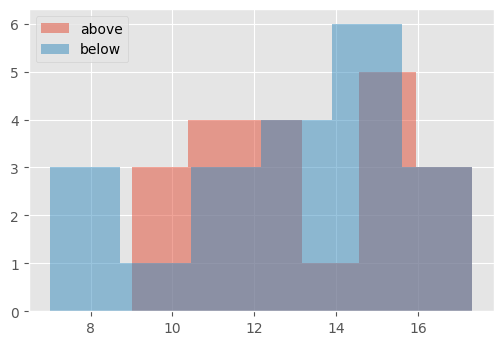

In [72]:
_ = plt.hist(df_compare_rating_1['12, 7, 8'], bins = 'auto', alpha=0.5, label='above')
_ = plt.hist(df_compare_rating_1['rest'], bins = 'auto', alpha=0.5, label='below')
plt.legend()
plt.show()

明顯並非常態分佈，故使用 Kruskal-Wallis Test

+ $H_0:$ The two population locations are the same.<br>
+ $H_1:$ The location of population 1 (7,8,12) is to the right of the location of population 2 (rest).

In [73]:
stats.kruskal(df_compare_rating_1['12, 7, 8'], df_compare_rating_1['rest'])

KruskalResult(statistic=0.03095238095238126, pvalue=0.8603466677154216)

$p$-value 大於 0.05，沒有足夠的證據拒絕虛無假設。  
結論：沒有足夠的證據顯示寒暑假上映的電影比較多。

##### 2. 過年大片是不是真的比較夯？

雖然沒有台灣過年發布電影的數據，但我們也可以看看全世界在所謂的**聖誕假期**上映的電影是否有更好的票房。

**Time Series**

先看一下是否每年的這個季節都有一個 seasonal pattern 存在。（不考慮後 COVID 時期）

In [74]:
def get_every_x_mas(min_year, max_year, period=11, start_date=(12, 24)):
    date_lst = []
    for year in range(min_year, max_year):
        date_lst += pd.date_range(datetime(year, *start_date), periods=period).tolist()
    return date_lst

In [75]:
rev_ts = u_movie_df[['title', 'release_date', 'revenue', 'budget', 'ROI', 'TW_release_date', 'log_revenue', 'log_budget', 'log_ROI']][u_movie_df['release_date'] < covid_date].sort_values(by='release_date').reset_index(drop=True)

In [76]:
rev_ts['Time'] = rev_ts['release_date'].apply(mpl_dates.date2num)

x_name = 'Time'
y_name = 'revenue'

rev_df = rev_ts.set_index('release_date')

min_year = rev_ts.release_date.min().year
max_year = rev_ts.release_date.max().year

greater_x_mas_date = get_every_x_mas(min_year, max_year, period=25, start_date=(12, 10))

rev_ts['is_xmas'] = rev_ts['release_date'].apply(lambda x: 1 if x in greater_x_mas_date else 0)
rev_ts['release_year'] = rev_ts['release_date'].apply(lambda x: x.year)
rev_ts['release_month'] = rev_ts['release_date'].apply(lambda x: x.month)
display(rev_ts.head())
print(np.sum(rev_ts['is_xmas'] == 1))

title release_date    revenue    budget       ROI  \
0              Scream 3   2000-02-03  161834276  40000000  3.045857   
1             The Beach   2000-02-03  144056873  40000000  2.601422   
2      The Tigger Movie   2000-02-11   45554533  30000000  0.518484   
3           Boiler Room   2000-02-18   28780255   7000000  3.111465   
4  The Whole Nine Yards   2000-02-18  106371651  41300000  1.575585   

  TW_release_date  log_revenue  log_budget   log_ROI     Time  is_xmas  \
0             NaN    18.902083   17.504390  1.397693  10990.0        0   
1             NaN    18.785719   17.504390  1.281329  10990.0        0   
2             NaN    17.634421   17.216708  0.417713  10998.0        0   
3             NaN    17.175200   15.761421  1.413779  11005.0        0   
4             NaN    18.482450   17.536373  0.946077  11005.0        0   

   release_year  release_month  
0          2000              2  
1          2000              2  
2          2000              2  
3          2000              2  
4          2000              2

225


從 release_month histogram 來看，我們可以發現，確實在冬天所上映的電影較夏天為多。  
我們將聖誕假期的期限延長一點（從 12/10 到 1/4），這讓我們擁有 225 部在「聖誕季節」上映的電影。

In [77]:
rev_df.resample('M').agg(dict(revenue='mean')).to_period('M')

revenue
release_date              
2000-02       8.170775e+07
2000-03       1.081047e+08
2000-04       5.755547e+07
2000-05       2.309155e+08
2000-06       1.508056e+08
...                    ...
2019-10       2.029394e+08
2019-11       9.139465e+07
2019-12       2.690879e+08
2020-01       9.086521e+07
2020-02       1.364924e+08

[241 rows x 1 columns]

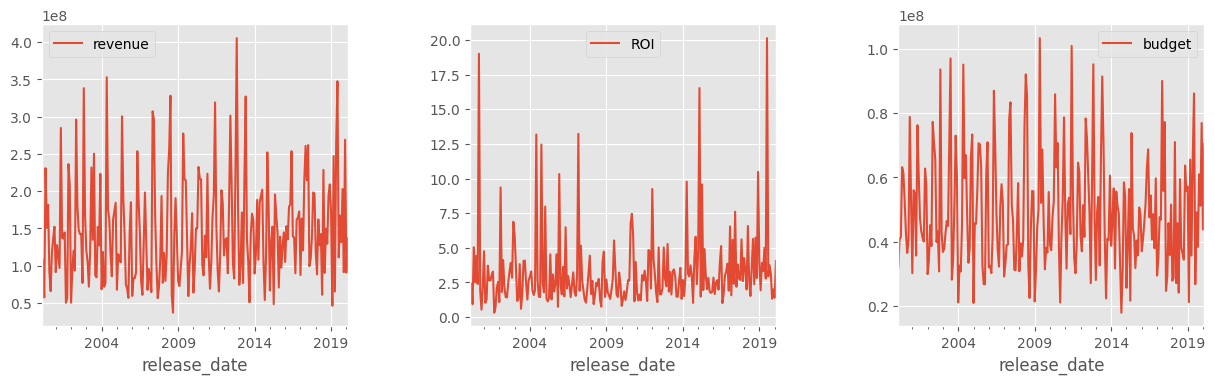

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
rev_df.resample('M').agg(dict(revenue='mean')).to_period('M').plot(ax=axes[0])
rev_df.resample('M').agg(dict(ROI='mean')).to_period('M').plot(ax=axes[1])
rev_df.resample('M').agg(dict(budget='mean')).to_period('M').plot(ax=axes[2])
plt.show()

從上面的折線圖，我們可以看到，票房和時間似乎有一定的順序在。  
所以我們使用 Time Series 做一次 regression，分別用 month 和 quarter 來做比較。

**月線**：以月為單位

In [79]:
rev_by_month_df = rev_df.resample('M').agg('mean').to_period('M')
rev_by_month_df.reset_index(inplace=True)
rev_by_month_df['month'] = rev_by_month_df['release_date'].apply(lambda x: x.month)
rev_by_month_df['release_date'] = rev_by_month_df['release_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m'))
rev_by_month_df['Time'] = np.arange(0, rev_by_month_df.shape[0] + 0)
rev_by_month_df.head()

release_date       revenue        budget       ROI  log_revenue  log_budget  \
0   2000-02-01  8.170775e+07  3.190000e+07  1.704464    18.007960   17.146781   
1   2000-03-01  1.081047e+08  4.085000e+07  2.428687    18.225011   17.265964   
2   2000-04-01  5.755547e+07  4.137500e+07  0.930673    17.614707   17.301844   
3   2000-05-01  2.309155e+08  6.318750e+07  5.041054    18.822957   17.551249   
4   2000-06-01  1.508056e+08  6.131111e+07  2.514755    18.488506   17.494954   

    log_ROI  Time  month  
0  0.861179     0      2  
1  0.959047     1      3  
2  0.312864     2      4  
3  1.271709     3      5  
4  0.993552     4      6

In [80]:
x_name = 'Time'
y_name = 'revenue'

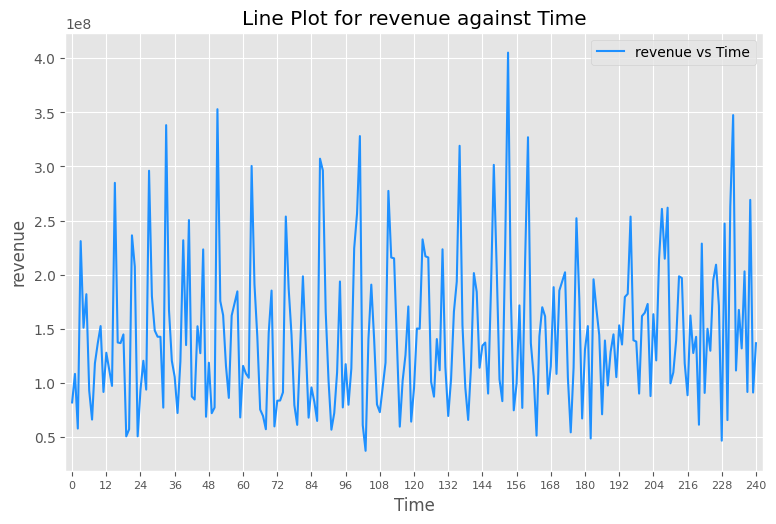

In [81]:
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_month_df[x_name], rev_by_month_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_month_df[x_name], rotation=0, fontsize=8)

# slope, intercept, r_value, p_value, std_err = stats.linregress(rev_by_month_df[x_name], rev_by_month_df[y_name])  # order matters
# ax = sns.regplot(x=x_name, y=y_name, data=rev_by_month_df, ci=None, scatter_kws={'color': 'dodgerblue', 'alpha': 0}, line_kws={
#                 'color': '#ffaa77', 'label': f"$\hat y = {intercept:.4f} + {slope:.4f} x$"}) # 這樣才有 regression model
plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')

ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
plt.margins(x=.01, tight=False)
plt.legend()
plt.show()

通常五月和十一月附近是高峰期，但這個現象在後期有點被打亂，所以做出來的預測結果不為完全正確。

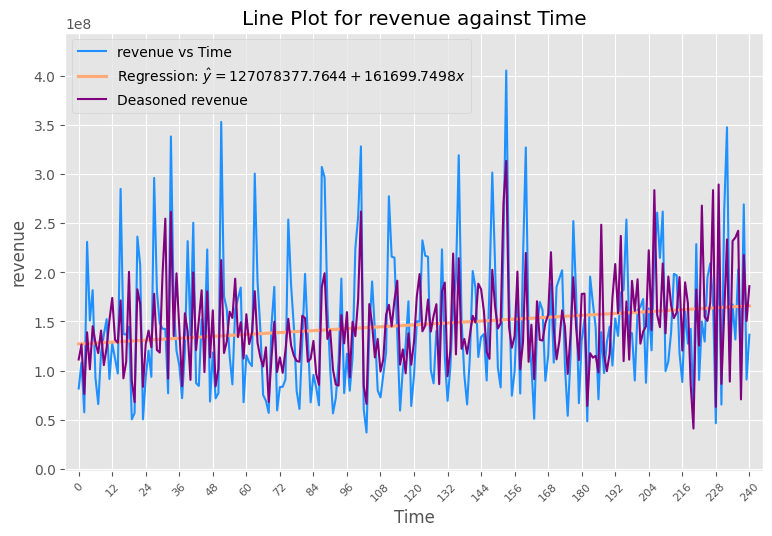

In [82]:
des_df = mgt2001.ts.smoothing(rev_by_month_df, y_name, x_name, period=12, option='cma')
des_df.head()

des_y_name = f'Des_{y_name}'

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_month_df[x_name], rev_by_month_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_month_df[x_name], rotation=45, fontsize=8)

slope, intercept, r_value, p_value, std_err = stats.linregress(des_df[x_name], des_df[des_y_name])  # order matters
ax = sns.regplot(x=x_name, y=des_y_name, data=des_df, ci=None, scatter_kws={'color': 'dodgerblue', 'alpha': 0}, line_kws={
                'color': '#ffaa77', 'label': f"Regression: $\hat y = {intercept:.4f} + {slope:.4f} x$"}) # 這樣才有 regression model
plt.plot(des_df[des_y_name], label=f'Deasoned {y_name}', color='purple')
plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')
ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
mgt2001.add_margin(ax, x=0.02)
plt.legend()
plt.show()

In [83]:
dd = pd.DataFrame(des_df['SeaIdx'][:12])
dd['Month'] = (dd.index) % 12 + 1
dd['Month'] = np.append(dd['Month'].shift(-1).dropna(), 1)
dd

SeaIdx  Month
0   0.734253    2.0
1   0.854297    3.0
2   0.756213    4.0
3   1.661689    5.0
4   1.488648    6.0
5   1.253085    7.0
6   0.721391    8.0
7   0.559422    9.0
8   0.837616   10.0
9   1.293132   11.0
10  1.236277   12.0
11  0.603975    1.0

呈上，確實根據我們所算出的結果，我們可以看出一個 monthly pattern，通常在 5, 6, 7 月時，票房會呈現一個上升的趨勢；在 11, 12 月時，又是另一個高峰期。

In [84]:
x_names = [x_name]
res_dict, assessment = mgt2001.model.MultipleRegression(x_names=x_names, y_name=des_y_name, df=des_df, assessment=False, t_test_c=0, t_test_option='two-tail')
df_result = res_dict['df_result']

                            OLS Regression Results                            
Dep. Variable:            Des_revenue   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.88
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           0.000148
Time:                        16:04:10   Log-Likelihood:                -4589.4
No. Observations:                 241   AIC:                             9183.
Df Residuals:                     239   BIC:                             9190.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.271e+08   5.82e+06     21.852      0.0

In [85]:
new_t = np.arange(rev_by_month_df.shape[0], rev_by_month_df.shape[0] + 12)
df_result = res_dict['df_result']
pdf = mgt2001.ts.seasonal_prediction(des_df, df_result, y_name, x_name, new_t, period=12, show=False, option='cma') # from smoothing_option
pdf.tail(12)

release_date  revenue  budget  ROI  log_revenue  log_budget  log_ROI  \
241          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
242          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
243          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
244          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
245          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
246          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
247          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
248          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
249          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
250          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
251          NaT      NaN     NaN  NaN          NaN         NaN      NaN   
252          NaT      NaN     NaN  NaN          NaN         NaN      NaN   

      Time  month   SID    SeaIdx  orig  Des_revenue   Pre_revenue  
241  241.0    NaN   2.0  0.854297   NaN          NaN  1.418544e+08  
242  242.0    NaN   3.0  0.756213   NaN          NaN  1.256899e+08  
243  243.0    NaN   4.0  1.661689   NaN          NaN  2.764576e+08  
244  244.0    NaN   5.0  1.488648   NaN          NaN  2.479091e+08  
245  245.0    NaN   6.0  1.253085   NaN          NaN  2.088828e+08  
246  246.0    NaN   7.0  0.721391   NaN          NaN  1.203688e+08  
247  247.0    NaN   8.0  0.559422   NaN          NaN  9.343375e+07  
248  248.0    NaN   9.0  0.837616   NaN          NaN  1.400326e+08  
249  249.0    NaN  10.0  1.293132   NaN          NaN  2.163948e+08  
250  250.0    NaN  11.0  1.236277   NaN          NaN  2.070805e+08  
251  251.0    NaN  12.0  0.603975   NaN          NaN  1.012655e+08  
252  252.0    NaN   1.0  0.734253   NaN          NaN  1.232273e+08

<AxesSubplot:>

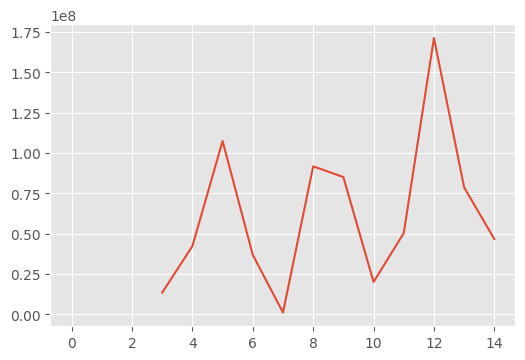

In [86]:
post_rev_ts = u_movie_df[['title', 'release_date', 'revenue', 'budget', 'ROI', 'TW_release_date', 'log_revenue', 'log_budget', 'log_ROI']][u_movie_df['release_date'] >= covid_date].sort_values(by='release_date').reset_index(drop=True)
post_rev_df = post_rev_ts.set_index('release_date')

post_rev_by_month_df = post_rev_df.resample('M').agg('mean').to_period('M')
post_rev_by_month_df.reset_index(inplace=True)
post_rev_by_month_df['month'] = post_rev_by_month_df['release_date'].apply(lambda x: x.month)
post_rev_by_month_df['release_date'] = post_rev_by_month_df['release_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m'))
post_rev_by_month_df['Time'] = np.arange(0, post_rev_by_month_df.shape[0] + 0)
post_rev_by_month_df.head(12)
post_rev_by_month_df['revenue'].plot()

該 model 的解釋力非常差，因此這個標準並不適用於後續的預測上。

**季線**：以季節為單位

在這裏，我們將季節分為春夏秋冬（1, 2, 3, 4）。通常，冬天和夏天是兩大我們較為熟悉的電影季節。除了有暑假與寒假之外，我們也可以透過上面所做過的 visual analysis 看出冬天時節上映的電影較多。但我們真正好奇的是，既然冬天上映較多電影，他的票房有沒有也較平均來的高呢？

In [87]:
rev_by_quarter_df = rev_df.resample('Q-NOV', convention='end').agg('mean')
rev_by_quarter_df.reset_index(inplace=True)
rev_by_quarter_df['month'] = rev_by_quarter_df['release_date'].apply(lambda x: x.month)
rev_by_quarter_df['Time'] = np.arange(0, rev_by_quarter_df.shape[0] + 0)
rev_by_quarter_df['Quarter'] = rev_by_quarter_df['month'].replace({2: 4, 5: 1, 8: 2, 11: 3})
rev_by_quarter_df.head()

release_date       revenue        budget       ROI  log_revenue  log_budget  \
0   2000-02-29  8.170775e+07  3.190000e+07  1.704464    18.007960   17.146781   
1   2000-05-31  1.303390e+08  4.788462e+07  2.771565    18.221209   17.364784   
2   2000-08-31  1.441638e+08  5.296250e+07  3.113528    18.498805   17.398395   
3   2000-11-30  1.120160e+08  5.549966e+07  5.830097    18.003308   17.283450   
4   2001-02-28  1.302364e+08  4.708095e+07  2.696586    18.218020   17.332628   

    log_ROI  Time  month  Quarter  
0  0.861179     0      2        4  
1  0.856425     1      5        1  
2  1.100411     2      8        2  
3  0.719858     3     11        3  
4  0.885392     4      2        4

In [88]:
rev_by_quarter_df.groupby('Quarter').mean()

revenue        budget       ROI  log_revenue  log_budget  \
Quarter                                                                  
1        1.547893e+08  5.290951e+07  2.978619    18.051562   17.244645   
2        1.682057e+08  5.564069e+07  3.349218    18.216457   17.268858   
3        1.237739e+08  4.245522e+07  3.084763    17.793384   17.064763   
4        1.302427e+08  4.449312e+07  3.480518    18.059940   17.162876   

          log_ROI  Time  month  
Quarter                         
1        0.806917    39      5  
2        0.947599    40      8  
3        0.728621    41     11  
4        0.897064    40      2

In [89]:
x_name = 'Time'
y_name = 'revenue'

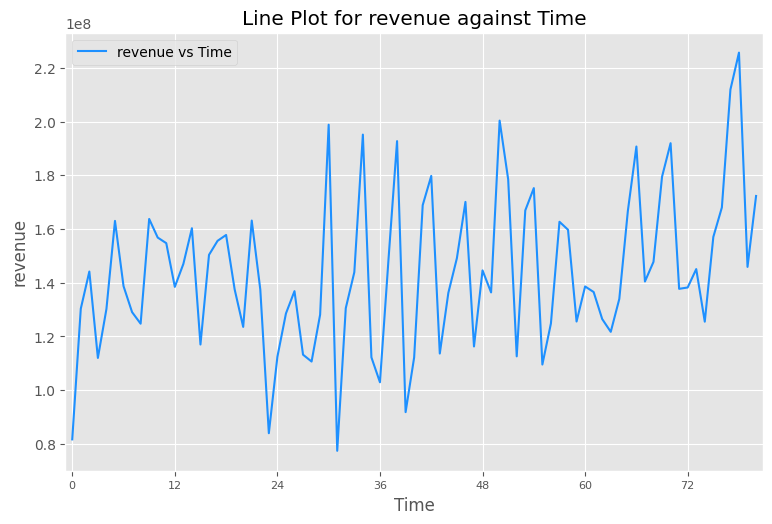

In [90]:
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_quarter_df[x_name], rev_by_quarter_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_quarter_df[x_name], rotation=0, fontsize=8)

plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')

ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
plt.margins(x=.01, tight=False)
plt.legend()
plt.show()

轉換成季節之後，我們可以看到**夏天**通常會是票房的高峰期。

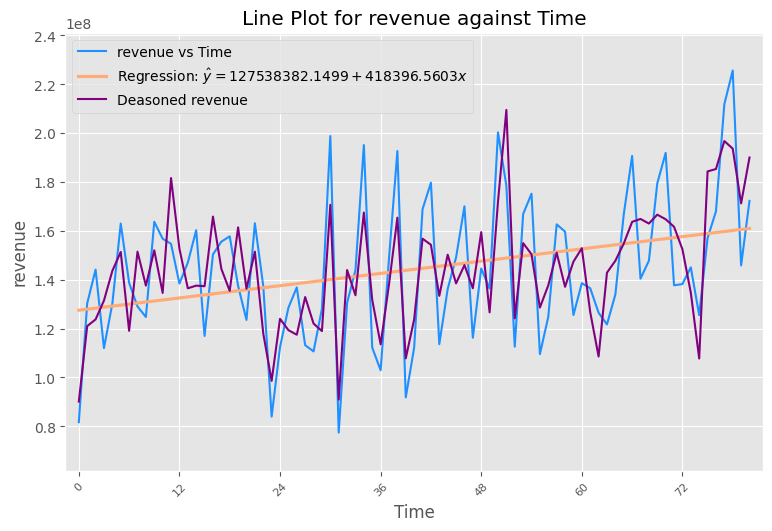

In [91]:
des_df = mgt2001.ts.smoothing(rev_by_quarter_df, y_name, x_name, period=4, option='cma')
des_df.head()

des_y_name = f'Des_{y_name}'

fig, ax = plt.subplots(figsize=(9,6))
plt.plot(rev_by_quarter_df[x_name], rev_by_quarter_df[y_name], color="dodgerblue", label=f'{y_name} vs {x_name}')
plt.xticks(rev_by_quarter_df[x_name], rotation=45, fontsize=8)

slope, intercept, r_value, p_value, std_err = stats.linregress(des_df[x_name], des_df[des_y_name])  # order matters
ax = sns.regplot(x=x_name, y=des_y_name, data=des_df, ci=None, scatter_kws={'color': 'dodgerblue', 'alpha': 0}, line_kws={
                'color': '#ffaa77', 'label': f"Regression: $\hat y = {intercept:.4f} + {slope:.4f} x$"}) # 這樣才有 regression model
plt.plot(des_df[des_y_name], label=f'Deasoned {y_name}', color='purple')
plt.subplots_adjust(bottom=0.15)
plt.xlabel(x_name)
plt.ylabel(y_name)
plt.title(f'Line Plot for {y_name} against {x_name}')
ax.set_xticks(ax.get_xticks()[::12]) # show the data of the first month for each year
mgt2001.add_margin(ax, x=0.02)
plt.legend()
plt.show()

In [92]:
dd = pd.DataFrame(des_df['SeaIdx'][:4])
dd['Quarter'] = (dd.index) % 4 + 1
dd['Quarter'] = np.append(dd['Quarter'].shift(-1).dropna(), 1)
dd

SeaIdx  Quarter
0  0.906559      2.0
1  1.076810      3.0
2  1.164830      4.0
3  0.851801      1.0

根據我們所算出的結果，我們確實可以看出一個 seasonal pattern，秋季和冬季反而變成兩大高峰期。  
從這裡已經沒有必要繼續往下做了，我們可以總結出，雖然乍看之下電影票房有季節性的變化，但仍是難以預測的。

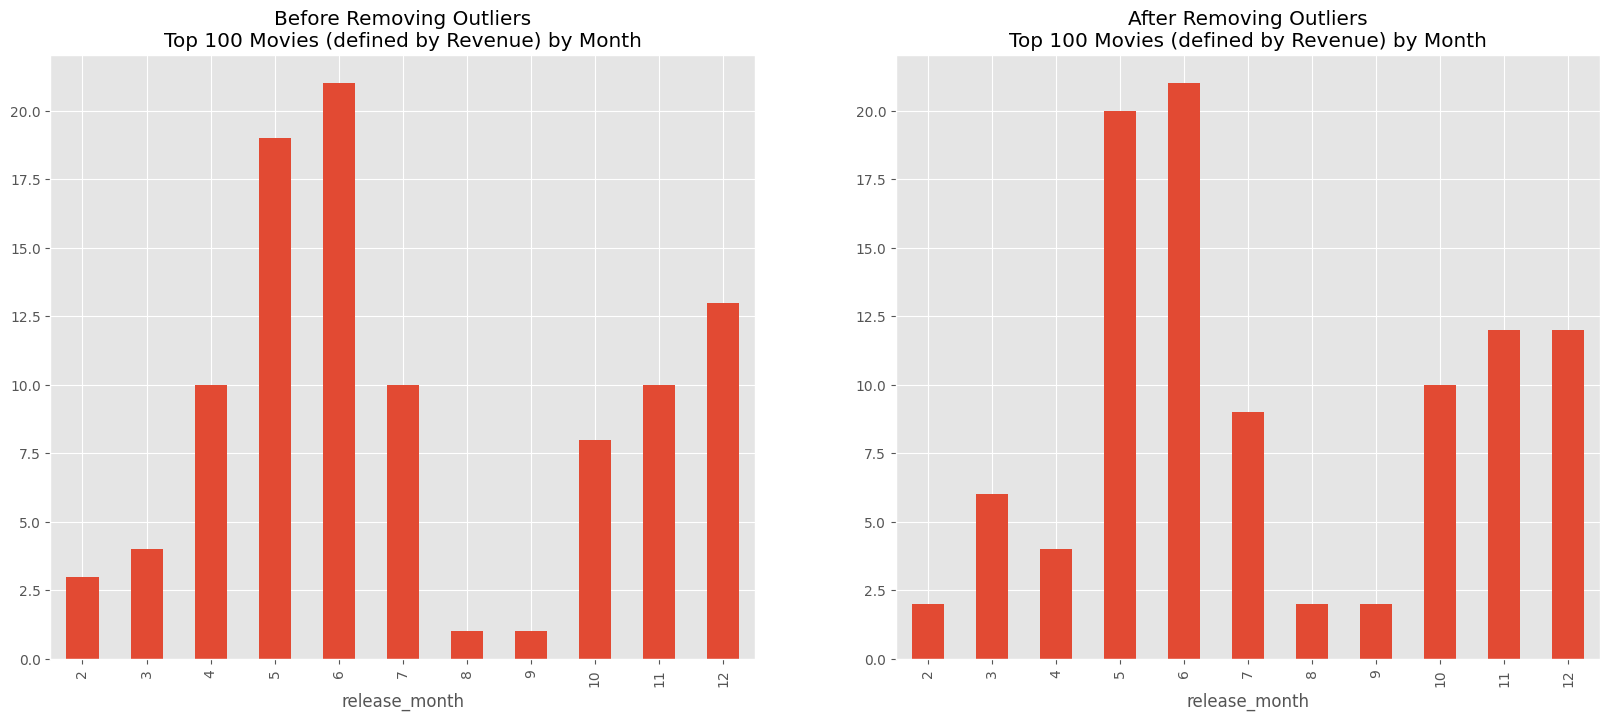

In [93]:
movie_df = pd.read_excel('../data/sorted_all_movie.xlsx', engine='openpyxl', index_col=0)
covid_date = datetime(2020, 3, 1)
movie_df['has_collection'] = movie_df['belongs_to_collection'].isna().replace({True: 0, False: 1})
movie_df['pre_covid'] = (movie_df['release_date'] < covid_date).replace({True: 1, False: 0})
movie_df['post_covid'] = (movie_df['release_date'] >= covid_date).replace({True: 1, False: 0})
movie_df['release_year'] = movie_df['release_date'].apply(lambda x: x.year)
movie_df['release_month'] = movie_df['release_date'].apply(lambda x: x.month)

# Plot
fig = plt.figure(figsize=(20, 8))
row, col = 1, 2
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax = fig.add_subplot(row, col, 1)
month_movie_df = movie_df.copy()
month_movie_df['release_month'] = month_movie_df['release_date'].apply(lambda x: x.month)
ax = month_movie_df.sort_values(by='revenue', ascending=False).head(100)[['release_date', 'title', 'zh_title', 'revenue', 'release_month']].groupby('release_month').count()['release_date'].plot(kind='bar', legend=None)
plt.title('Before Removing Outliers\nTop 100 Movies (defined by Revenue) by Month')

ax = fig.add_subplot(row, col, 2)
ax = u_movie_df.sort_values(by='revenue', ascending=False).head(100)[['release_date', 'title', 'zh_title', 'revenue', 'release_month']].groupby('release_month').count()['release_date'].plot(kind='bar', legend=None)
plt.title('After Removing Outliers\nTop 100 Movies (defined by Revenue) by Month')

plt.show()

從上面表格我們可以看出，在移除 outlier 前後，排名前 100 的電影，都在 5, 6 月佔了大多數，這點從 monthly trend 中也能看出。  
而另一個高峰期，確實出現在 11 或 12 月。可以看到 1 月上映的電影都不曾出現在百大電影裡面。

因為電影牽涉到太多人為因素，實在不能百分之百肯定地說一定什麼月份票房比較好。

**回到正題，所以過年時真的有因為這歡樂的氣氛導致票房更高嗎？**

我們預期：每年在聖誕假期（12/24 ~ 1/3）的電影票房都會比較好。這裏的資料在上面已經處理完畢。


雖然顯示為沒有，但我們還是做一個更為精準的分析，使用的是 $t$-test and estimator of $\mu_1 - \mu_2$.

**Check Normality**

+ $H_0$: The population is normally distributed.  
+ $H_1$: The population is not normally distributed.

In [94]:
xmas_df = pd.DataFrame({'no': rev_ts[rev_ts.is_xmas == 0]['revenue'].values})
xmas_df['yes'] = rev_ts[rev_ts.is_xmas == 1]['revenue'].reset_index(drop=True)
y_xmas = xmas_df['yes'].dropna()
n_xmas = xmas_df['no'].dropna()
xmas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   no      2532 non-null   int64  
 1   yes     225 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 39.7 KB


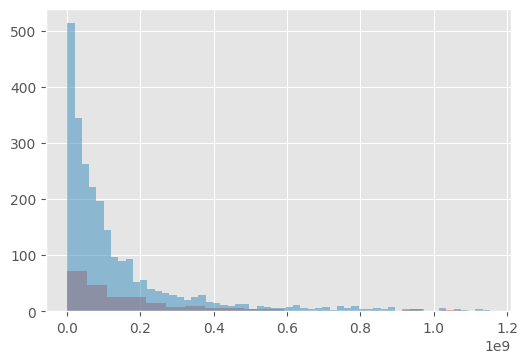

In [95]:
_ = plt.hist(y_xmas, bins = 'auto', alpha=0.5)
_ = plt.hist(n_xmas, bins = 'auto', alpha=0.5)
plt.show()

因為資料不是常態分佈，因此我們使用 Wilcoxon Rank Sum Test 來做檢定。

**Wilcoxon Rank Sum Test**

+ $H_0$: The two population locations are the same.  
+ $H_1$: Population 1 (y_xmas) is located to the right (n_xmas) of population 2 (greater).  

In [96]:
n1 = y_xmas.shape[0]
n2 = n_xmas.shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=xmas_df, to_compute='no', alternative='less') 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 3447837.0
(n1, n2) = (2532, 225)
mu_t = 3491628.0
sigma_t = 11442.729132510303
z statistic value (observed) = -3.8270
p-value = 0.0001 (Overwhelming Evidence)
Reject H_0 (less) → True



In this case, we can perform the standardized test, since both sample sizes are larger than 10. The $p$-value of the standardized test is $0.0000 < 0.05$, which means that we can reject the null hypothesis.

結論：聖誕節所上映的電影確實較剩餘年度的票房要高。

##### 3. 夏天的電影比較熱門？

因為有南北半球的問題，我們在這邊先行省略南半球的天氣。在此，夏天的意思是指 6、7、8 月。  

透過上面的視覺化分析，我們預期夏天的電影可能會較其他季節來的更夯一些。

In [97]:
cond = np.array(rev_ts['release_month'] == 6) | (rev_ts['release_month'] == 7) | (rev_ts['release_month'] == 8) 
rev_ts['Season'] = rev_ts['release_month'].replace({12: 4, 1: 4, 2: 4, 3: 1, 4: 1, 5: 1, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3})
rev_ts['Summer'] = cond.replace({True: 1, False: 0})

In [98]:
rev_ts.head()

title release_date    revenue    budget       ROI  \
0              Scream 3   2000-02-03  161834276  40000000  3.045857   
1             The Beach   2000-02-03  144056873  40000000  2.601422   
2      The Tigger Movie   2000-02-11   45554533  30000000  0.518484   
3           Boiler Room   2000-02-18   28780255   7000000  3.111465   
4  The Whole Nine Yards   2000-02-18  106371651  41300000  1.575585   

  TW_release_date  log_revenue  log_budget   log_ROI     Time  is_xmas  \
0             NaN    18.902083   17.504390  1.397693  10990.0        0   
1             NaN    18.785719   17.504390  1.281329  10990.0        0   
2             NaN    17.634421   17.216708  0.417713  10998.0        0   
3             NaN    17.175200   15.761421  1.413779  11005.0        0   
4             NaN    18.482450   17.536373  0.946077  11005.0        0   

   release_year  release_month  Season  Summer  
0          2000              2       4       0  
1          2000              2       4       0  
2          2000              2       4       0  
3          2000              2       4       0  
4          2000              2       4       0

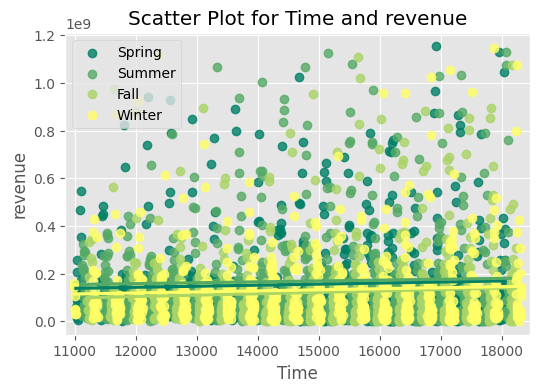

In [99]:
mgt2001.model.multi_variable_plot(x_name=x_name, y_name=y_name, df=rev_ts, indicator='Season', label={1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, cmap='summer')

In [100]:
long_df = rev_ts.copy()
long_df = long_df[['Season', 'revenue', 'log_revenue']] # .dropna()
treatment_name_list = long_df['Season'].unique() 
display(long_df.head())

Season    revenue  log_revenue
0       4  161834276    18.902083
1       4  144056873    18.785719
2       4   45554533    17.634421
3       4   28780255    17.175200
4       4  106371651    18.482450

In [101]:
display(long_df.groupby(['Season']).describe())

revenue                                                                \
         count          mean           std       min         25%         50%   
Season                                                                         
1        623.0  1.545394e+08  2.061811e+08  956425.0  26249744.5  73983359.0   
2        668.0  1.680043e+08  2.089677e+08  924793.0  38361373.0  93183493.0   
3        792.0  1.217234e+08  1.754227e+08  992181.0  19010562.0  56759438.5   
4        674.0  1.315140e+08  1.662886e+08  970816.0  32645332.0  76735492.5   

                                   log_revenue                       \
                 75%           max       count       mean       std   
Season                                                                
1       1.771306e+08  1.153296e+09       623.0  18.012896  1.444365   
2       2.098657e+08  1.131928e+09       668.0  18.190050  1.408470   
3       1.452186e+08  1.108561e+09       792.0  17.737752  1.468545   
4       1.602227e+08  1.148462e+09       674.0  18.049567  1.238129   

                                                               
              min        25%        50%        75%        max  
Season                                                         
1       13.770959  17.083167  18.119351  18.992390  20.865890  
2       13.737326  17.462540  18.350079  19.161978  20.847188  
3       13.807662  16.760497  17.854315  18.793751  20.826329  
4       13.785893  17.301209  18.155875  18.892075  20.861689

夏天的電影票房確實有略高一點！

**Check Normality**

+ $H_0$: The population is normally distributed.  
+ $H_1$: The population is not normally distributed.

In [102]:
anova.shapiro(long_df, treatment_name_list, 'Season', 'revenue')

1: Statistics=0.6762, p=0.0000
2: Statistics=0.7036, p=0.0000
3: Statistics=0.7174, p=0.0000
4: Statistics=0.6513, p=0.0000


以上四個 $p$-value 都小於 0.05，代表所有資料都不是常態分佈，所以我們使用 Kruskal-Wallis Test。

**Kruskal-Wallis Test**

+ $H_0$: The locations of all the $4$ populations are the same.  
+ $H_1$: Not all $4$ population locations are the same.

In [103]:
long_df.groupby('Season')

short_df = pd.DataFrame([long_df[long_df['Season'] == 3]['revenue'].values, long_df[long_df['Season'] == 4]['revenue'].values, long_df[long_df['Season'] == 2]['revenue'].values, long_df[long_df['Season'] == 1]['revenue'].values]).T.reset_index(drop=True)
short_df.columns = [3, 4, 2, 1]
# short_df[2].dropna().shape

In [104]:
_ = non.kruskal_chi2_test(data=short_df)

======= Kruskal-Wallis Test with Chi-squared Test =======
(All sample size >= 5)

H statistic value (observed) = 41.4993
chi2 critical value = 7.8147
p-value = 0.0000 (Overwhelming Evidence)
Reject H_0 (Not all 4 population locations are the same) → True
    


上述結果僅能告訴我們，這四個季節的票房變化，確實有所差異。所以我們進一步用 Wilcoxon Rank Sum Test 來應證夏天電影相較於其他季節要高的事實。

**Wilcoxon Rank Sum Test**

+ $H_0$: The two population locations are the same.  
+ $H_1$: Population 2 is located to the right of the other population (greater).

* 夏天 vs. 冬天

In [105]:
n1 = short_df.loc[:, 2].dropna().shape[0]
n2 = short_df.loc[:, 4].dropna().shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=short_df[[2, 4]], to_compute=2, alternative='greater') # 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 467979
(n1, n2) = (668, 674)
mu_t = 448562.0
sigma_t = 7098.483265224105
z statistic value (observed) = 2.7354
p-value = 0.0031 (Overwhelming Evidence)
Reject H_0 (greater) → True



* 夏天 vs. 秋天

In [106]:
n1 = short_df.loc[:, 2].dropna().shape[0]
n2 = short_df.loc[:, 3].dropna().shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=short_df[[2, 3]], to_compute=2, alternative='greater') # 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 537890.0
(n1, n2) = (668, 792)
mu_t = 487974.0
sigma_t = 8025.744077654109
z statistic value (observed) = 6.2195
p-value = 0.0000 (Overwhelming Evidence)
Reject H_0 (greater) → True



* 夏天 vs. 春天

In [107]:
n1 = short_df.loc[:, 2].dropna().shape[0]
n2 = short_df.loc[:, 1].dropna().shape[0]

if np.sum(np.array([n1, n2]) > 10) == 2:
    print('Both datasets have sizes larger than 10.\n')
    updated_df, result_dict = non.ranksum_z_test(df=short_df[[2, 1]], to_compute=2, alternative='greater') # 

Both datasets have sizes larger than 10.

======= z-test =======
T (sum of ranks) = 449577
(n1, n2) = (668, 623)
mu_t = 431528.0
sigma_t = 6693.802407202252
z statistic value (observed) = 2.6964
p-value = 0.0035 (Overwhelming Evidence)
Reject H_0 (greater) → True



因為以上 3 個檢定的 $p$-value 都小於 0.05，有足夠的證據顯示夏天的票房高於其他三季。  
此結果與我們預期的相符。有點意外的是，在[2. 過年大片是不是真的比較夯？](#2-過年大片是不是真的比較夯)的分析中，我們可以總結出聖誕季節（包含 1/1 新年）時所上映的電影平均來說真的有較高的趨勢。以季節性來說，卻不是如此。我們可以看到夏天的電影平均來說有較高的票房，其次是春天，冬天與秋天都遠不及夏天所創下的票房。

#### 八、票房預測

經過前述各種變數的分析，我們希望可以找出對於票房有影響力的變數組合，並試著預測有哪些特質的電影會有比較好的票房。

我們曾嘗試採用 time-series regression model 但成效並不好，因為期數每年都不太一樣（可以見上面 Time Series 部分），所以最後依舊選擇複迴歸模型進行預測。

In [108]:
regression_df = u_movie_df[(u_movie_df['release_date'] > datetime(2010, 1, 1)) & (u_movie_df['release_date'] < datetime(2019, 12, 31))].copy().reset_index(drop=True)

In [109]:
regression_df['cast_popularity_ave'] = regression_df.cast_popularity_ave.fillna(regression_df.cast_popularity_ave.mean())
regression_df['rotten_score'] = regression_df['rotten_score'].fillna(regression_df['rotten_score'].mean())
regression_df['rotten_aud_score'] = regression_df['rotten_aud_score'].fillna(regression_df['rotten_aud_score'].mean())

In [110]:
x_names = ['budget', 'runtime', 'cast_cnt', 'crew_cnt', 'female_cast_cnt',
       'male_cast_cnt',  'TMDB_score', 'TMDB_vote_count', 'has_homepage', 'has_collection', 'cast_popularity_ave', 'rotten_score', 'rotten_aud_score']
y_name = 'revenue'

In [111]:
regression_df.shape

(1514, 36)

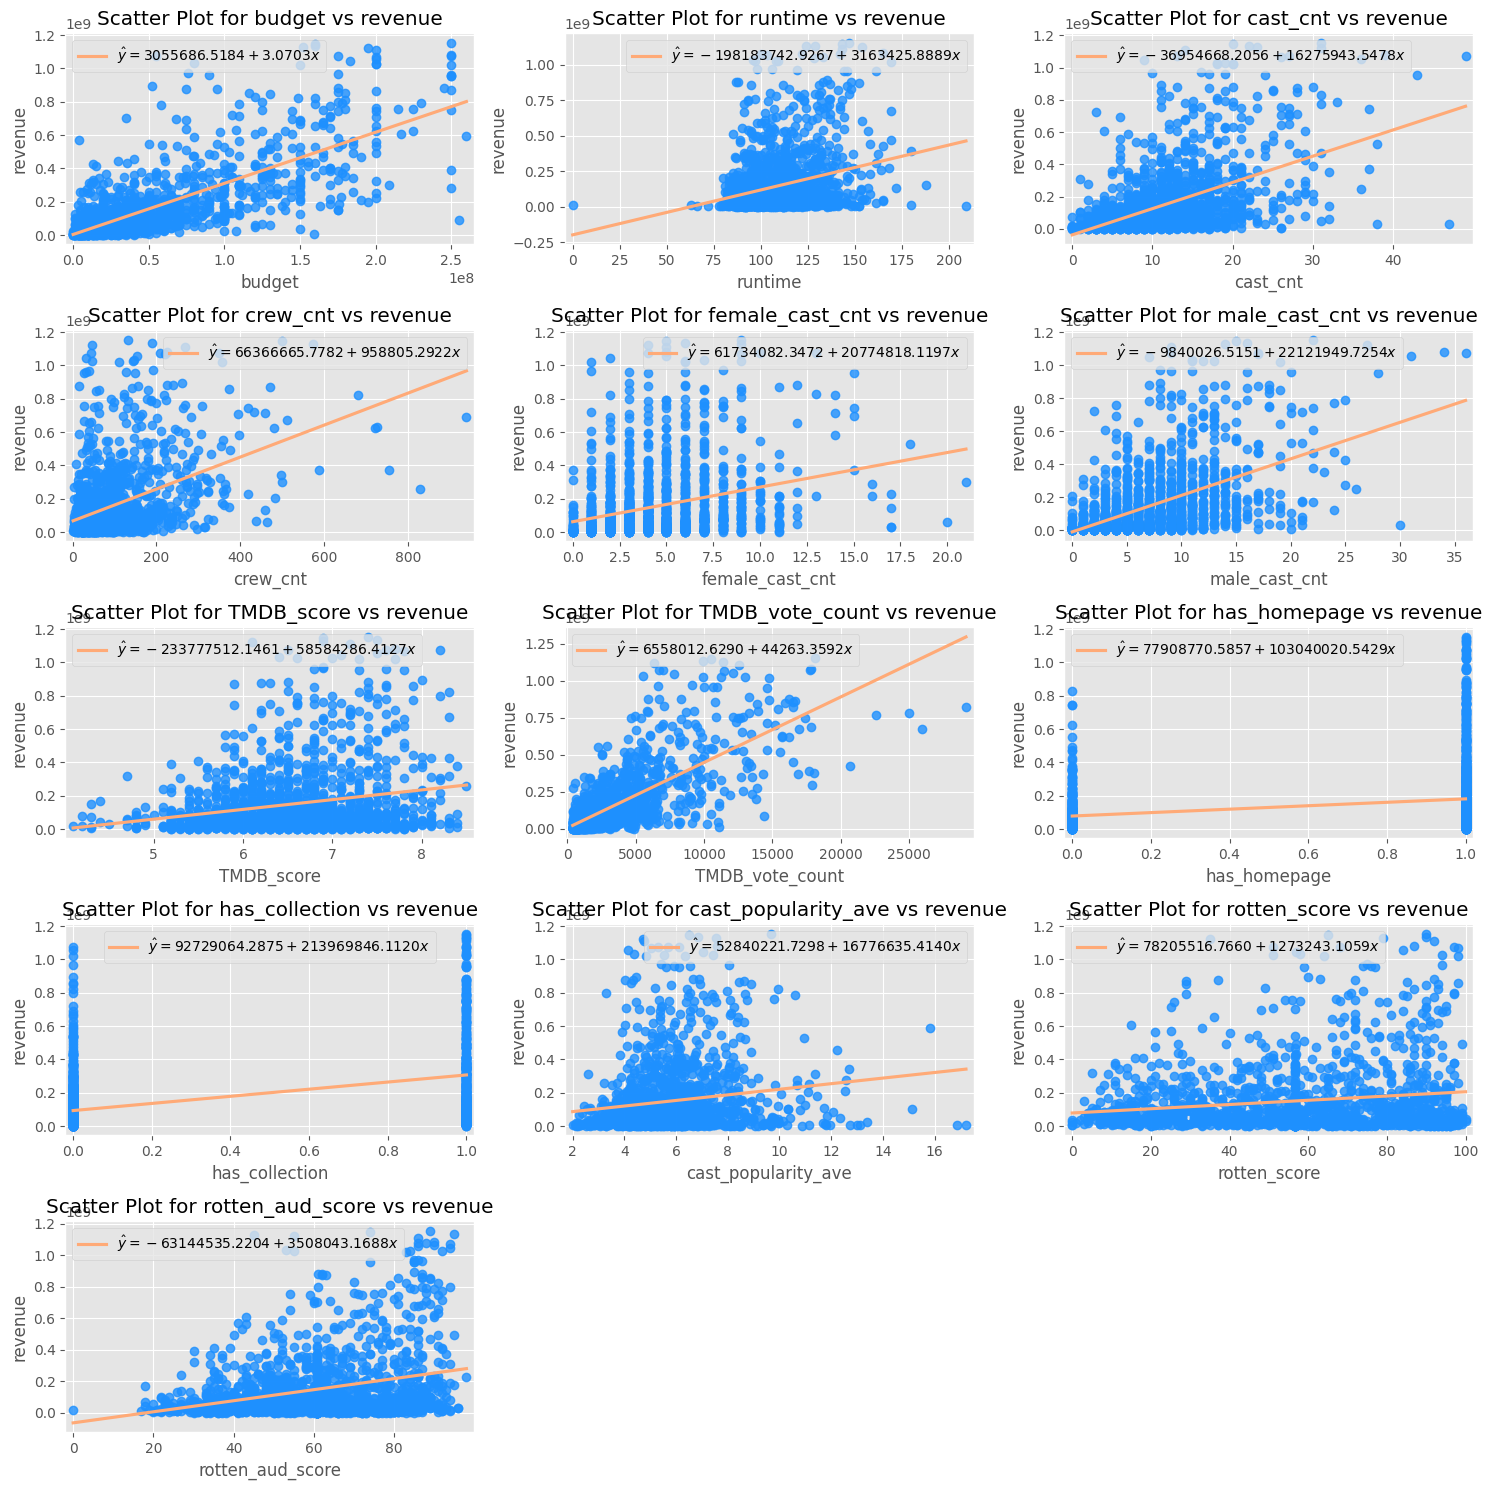

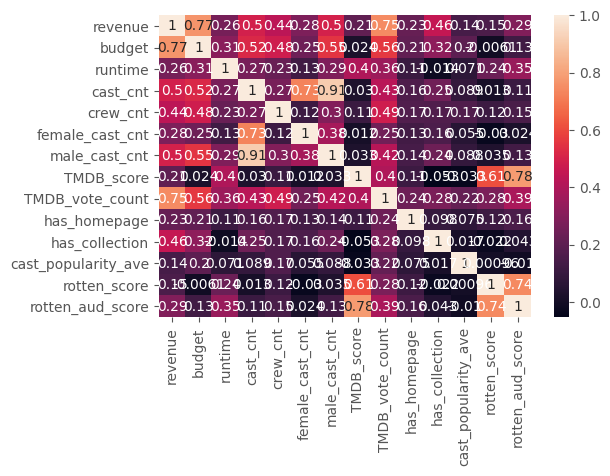

In [112]:
mgt2001.model.multi_scatter_plot(5, 3, regression_df, x_names, y_name, figsize=(15, 15)) # correlation table included

在下方的 DataFrame 我們可以看到 regression 與 ['budget', 'runtime', 'cast_cnt', 'crew_cnt', 'female_cast_cnt', 'male_cast_cnt',  'TMDB_score', 'TMDB_vote_count', 'cast_popularity_ave', 'rotten_score', 'rotten_aud_score'] 這些變數有正向線性關係。

In [113]:
mgt2001.model.multicollinearity(regression_df, x_names, y_name)

於是我們使用 stepwise regression 來做預測，看看是否能避開多元共線性的問題。

In [114]:
stepwise_res_dict = mgt2001.model.stepwise_selection(df =regression_df, y_name = y_name, x_names = x_names, verbose=False)

======= Stepwise Regression Selection =======
Stop after 13 iterations.

Best adjR2 =  0.7730319697104591
Best subset =  ['budget', 'TMDB_vote_count', 'has_collection', 'rotten_aud_score', 'runtime', 'cast_popularity_ave', 'cast_cnt', 'crew_cnt', 'female_cast_cnt']

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     573.6
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:04:20   Log-Likelihood:                -30022.
No. Observations:                1514   AIC:                         6.006e+04
Df Residuals:                    1504   BIC:                         6.012e+04
Df Model:                           9                                         
Covariance Type:      

根據 model 的係數，我們可以發現在 'cast_popularity_ave', 'runtime', 'crew-cnt', 'male_cast_cnt' 的正負號與相關係數的正負號不同，因此多元共線性的問題仍然存在。<br>
我們繼續嘗試其他不同的方法來解決多元共線性問題。

**Fix Multicollinearity**

經過多組測試，曾經嘗試使用 Data Transformation、best subset⋯⋯等方法效果皆不如預期，最後決定直接刪除具有 multicollinearity problem 的項目，意外發現此成效最好

+ dependent variables(y): 'revenue'
+ independent variables(x): 'budget'(x1), 'TMDB_vote_count'(x2), 'has_collection'(x3), 'rotten_aud_score(x4)', 'cast_cnt'(x5).


其中，indicator variables為'has_collection'.

In [115]:
new_x_names = stepwise_res_dict['best_subset'].copy()
new_x_names.remove('crew_cnt')
new_x_names.remove('cast_popularity_ave')
new_x_names.remove('runtime')

# 不同電腦會有不同結果
try:
    new_x_names.remove('male_cast_cnt')
except:
    pass
try:
    new_x_names.remove('female_cast_cnt')
except:
    pass
new_x_names

['budget', 'TMDB_vote_count', 'has_collection', 'rotten_aud_score', 'cast_cnt']

In [116]:
res_dict, assessment = mgt2001.model.MultipleRegression(x_names=new_x_names, 
                                                        y_name=y_name, 
                                                        df=regression_df, 
                                                        assessment=False, 
                                                        t_test_c=0, 
                                                        t_test_option='two-tail')

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     1002.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:04:20   Log-Likelihood:                -30041.
No. Observations:                1514   AIC:                         6.009e+04
Df Residuals:                    1508   BIC:                         6.013e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.764e+07   1.07e+07  

此 model 解決了多元共線性的問題，因此繼續往下做各項分析。

接著，在進一步檢驗這個模型的解釋力前我們要確認其殘差分析滿足下列三個條件：

1. Non-normality (常態性)
2. Heteroscedasticity and homoscedasticity (變異數同質性)
3. Non-independence of the error variable (獨立性)

For the first condition, the hypotheses are as follows:

+ $H_0$: The errors are normally distributed
+ $H_1$: The errors are not normally distributed

For the second condition, the hypotheses are:

+ $H_0$: The residuals are of constant variance (Homoscedasticity)
+ $H_1$: The residuals are not of constant variance (Heteroscedasticity)

For the third condition, the hypotheses are:

+ $H_0$: Randomness exists
+ $H_1$: Randomness does not exist

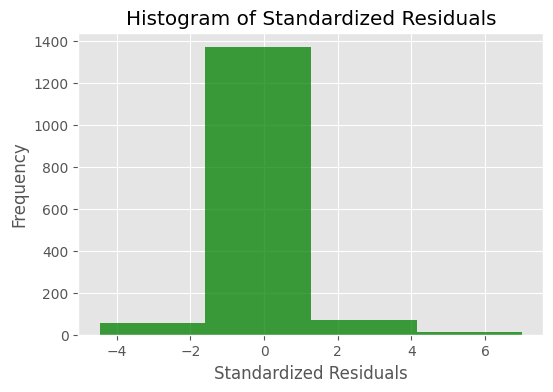

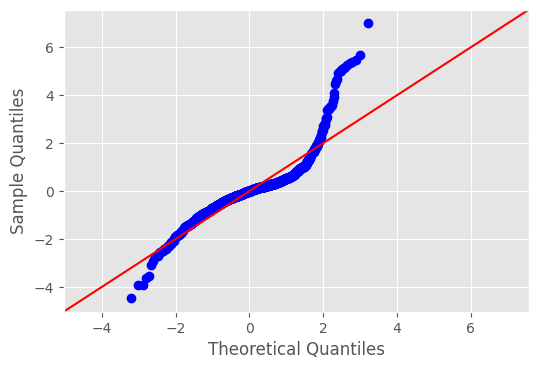

In [117]:
mu_3 = np.mean(res_dict['std_resid'])
sigma_3 = np.std(res_dict['std_resid'])
k_3 = res_dict['df_result'].df_model
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(res_dict['std_resid'], 4, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.grid(True)
bin_centers = [np.mean(k_3) for k_3 in zip(bins[:-1], bins[1:])]
plt.show()
fig = sm.qqplot(res_dict['std_resid'], stats.norm, fit=True, line='45')

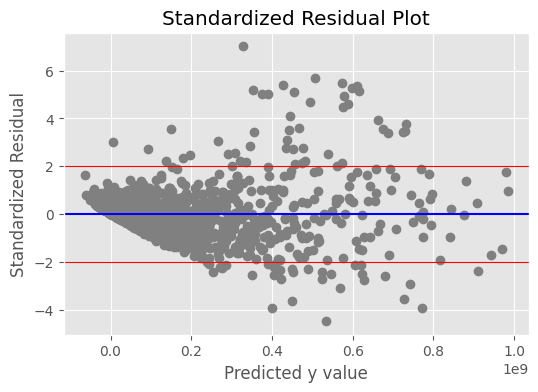

In [118]:
plt.plot(res_dict['y_pre'], res_dict['std_resid'], 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

In [119]:
res = mgt2001.model.runs_test(res_dict['std_resid'], cutoff='median') 

======= Runs Test =======
(n1 (757) or n2 (757) > 20)
Runs = 751
runs_exp (mu_r) = 758.0000
std (sigma_r) = 19.448646

z-value (observed statistic) = -0.3599
p-value = 0.7189
Reject H_0 (Randomness does not exist) → False



根據長條圖及qqplot的結果，我們可以暫時假設其殘差為常態分佈。

針對第二個條件，從上面殘差的分佈圖，我們無法拒絕虛無假設，並認定殘差具有同方差性（Homoscedasticity）。

而第三個條件的 $p$ 值 $= 0.7189> \alpha = 0.05$. 我們無法拒絕虛無假設，並認定取樣是隨機的。

+ The Standard Error of Estimate  
    The $s_\epsilon = 100474639.1618$ 和$y$的平均比較起來 ($\bar y =  150390687.2820$)， $s_\epsilon$ 並沒有比較小。因此這個模型並沒有太好的貼合資料。
+ The Coefficient of Determination  
    + $r^2 = 0.7686$ ，代表 76.86% $y$ 的變異可以被這個回歸模型解釋。剩餘的23.14%無法被解釋。
    + 調整後的 $r^2$ is $0.7678$，和 $r^2$的差距小於6%，代表這個模型沒有over-fitting的問題。
+ The $F$-test of ANOVA  
    $F$-test的$p$值 $=0.0000 < \alpha = 0.05$，因此我們可以拒絕虛無假設。代表至少有一個變數的係數不等於0，代表這個模型是**有效的**。
+ Testing of the Coefficients  
    + $H_0$: $\beta_i = 0$ 
    + $H_1$: $\beta_i \neq 0$
    + $i$ =1,2,3,4,5

In [120]:
for x, p in zip(new_x_names, res_dict['df_result'].pvalues[1:]):
    print("p-value of %s = %0.3f" % (x, p))
    if p < 0.05:
        print("  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.")
        print("  There is enough evidence to infer that %s is linearly related to monthly sales.\n" %x)
    else:
        print("  Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.")
        print("  There is not enough evidence to infer that %s is linearly related to monthly sales.\n" %x)

p-value of budget = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that budget is linearly related to monthly sales.

p-value of TMDB_vote_count = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that TMDB_vote_count is linearly related to monthly sales.

p-value of has_collection = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that has_collection is linearly related to monthly sales.

p-value of rotten_aud_score = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that rotten_aud_score is linearly related to monthly sales.

p-value of cast_cnt = 0.010
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that cast_

我們得到的模型為：

$$
ŷ = -97643508.4111 + 1.8114 x_1 + 23805.2576 x_2 + 86918589.9428 x_3 + 755207.4222 x_4 + 1247804.2424 x_5 
$$

+ $b_0 = -97643508.4111$: 當所有的變數皆為0時$y$的截距。但在所有的資料中並不包含這個範圍，因此不解讀截距的意義。
+ $b_1 = 1.8114$:在這個模型中，預算每多一美金，票房會成長\$1.8114 (在其他變數維持不變的前提下)。
+ $b_2 = 23805.2576$: 在這個模型中，TMDB_vote_count每多一單位，票房會成長\$23805.2576 (在其他變數維持不變的前提下)。
+ $b_3 = 86918589.9428$: 在這個模型中，如果有collection的話，票房會成長\$86918589.9428 (在其他變數維持不變的前提下)。 
+ $b_4 = 755207.4222$: 在這個模型中，rotten_aud_score每多一分，票房就會成長\$755207.4222 (在其他變數維持不變的前提下)。
+ $b_5 = 1247804.2424$: 在這個模型中，演員數每多一名，票房就會成長\$1247804.2424 (在其他變數維持不變的前提下)。

##### 如果去掉 Outliers 的結果會如何？

In [121]:
regression_df[y_name]

0        29922472
1       157107755
2        33583175
3       112462508
4        45236543
          ...    
1509     17133446
1510     73515024
1511    191540586
1512     50401502
1513    374733942
Name: revenue, Length: 1514, dtype: int64

+ dependent variables(y): 'revenue'<br>
+ independent variables(x): 'budget'(x1), 'TMDB_vote_count'(x2), 'has_collection'(x3), 'rotten_aud_score(x4)'

has_collection is indicator variable.

In [122]:
standard_resid = res_dict['std_resid']
x_data = regression_df[new_x_names].to_numpy()
y_data = regression_df[y_name]
outlier_index, infobs_index = mgt2001.team.Outlier_and_InfObs (standard_resid=standard_resid, x_data=x_data, y_data=y_data, Multi = True, df=regression_df)

outlier_index = np.array(outlier_index)
infobs_index = np.array(infobs_index)

outlier_infobs = np.concatenate([outlier_index, infobs_index])
outlier_infobs = list(dict.fromkeys(outlier_infobs))
# print(outlier_infobs)
regression_df = regression_df.drop(index=outlier_infobs)

regression_df = regression_df.reset_index()
regression_df = regression_df.drop(columns=['index'])

new_x_names.remove('cast_cnt') #since multicollinearity problem

res_dict_new, assessment_new = mgt2001.model.MultipleRegression(x_names=new_x_names, 
                                                        y_name=y_name, 
                                                        df=regression_df, 
                                                        assessment=False, 
                                                        t_test_c=0, 
                                                        t_test_option='two-tail')



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1533.
Date:                Sat, 26 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:04:21   Log-Likelihood:                -26863.
No. Observations:                1389   AIC:                         5.374e+04
Df Residuals:                    1384   BIC:                         5.376e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.274e+07   6.33e+06

接著，在進一步檢驗這個模型的解釋力前我們要確認其殘差分析滿足下列三個條件：

1. Non-normality (常態性)
2. Heteroscedasticity and homoscedasticity (變異數同質性)
3. Non-independence of the error variable (獨立性)

For the first condition, the hypotheses are as follows:

+ $H_0$: The errors are normally distributed
+ $H_1$: The errors are not normally distributed

For the second condition, the hypotheses are:

+ $H_0$: The residuals are of constant variance (Homoscedasticity)
+ $H_1$: The residuals are not of constant variance (Heteroscedasticity)

For the third condition, the hypotheses are:

+ $H_0$: Randomness exists
+ $H_1$: Randomness does not exist

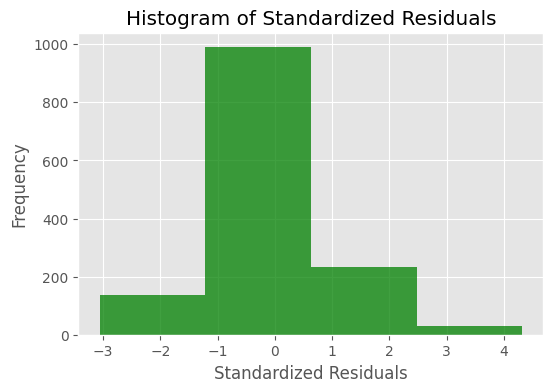

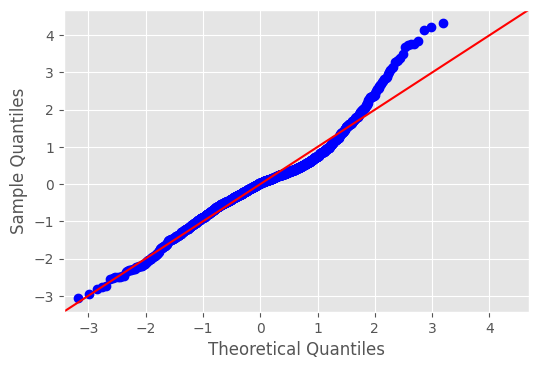

In [123]:
mu_3 = np.mean(res_dict_new['std_resid'])
sigma_3 = np.std(res_dict_new['std_resid'])
k_3 = res_dict_new['df_result'].df_model
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(res_dict_new['std_resid'], 4, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.grid(True)
bin_centers = [np.mean(k_3) for k_3 in zip(bins[:-1], bins[1:])]
plt.show()
fig = sm.qqplot(res_dict_new['std_resid'], stats.norm, fit=True, line='45')

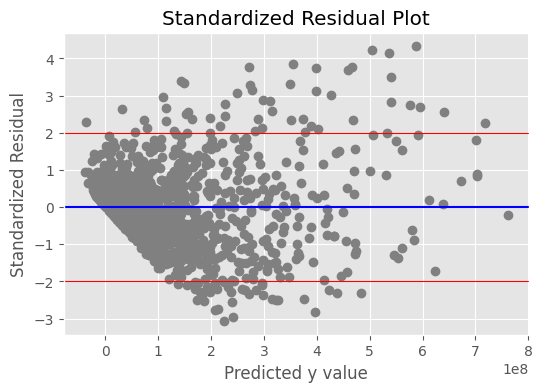

In [124]:
plt.plot(res_dict_new['y_pre'], res_dict_new['std_resid'], 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

In [125]:
res = mgt2001.model.runs_test(res_dict_new['std_resid'], cutoff='median') 

======= Runs Test =======
(n1 (695) or n2 (694) > 20)
Runs = 699
runs_exp (mu_r) = 695.4996
std (sigma_r) = 18.627922

z-value (observed statistic) = 0.1879
p-value = 0.8509
Reject H_0 (Randomness does not exist) → False



根據長條圖及qqplot的結果，我們可以假設其殘差為常態分佈。

針對第二個條件，從上面殘差的分佈圖，我們無法拒絕虛無假設，並認定殘差具有同方差性（Homoscedasticity）。

而第三個條件的 $p$ 值 $= 0.8509> \alpha = 0.05$. 我們無法拒絕虛無假設，並認定取樣是隨機的。

+ The Standard Error of Estimate  
    The $s_\epsilon = 59949741.3693$ 和$y$的平均比較起來 ($\bar y =  113392305.8323$)， $s_\epsilon$ 並沒有比較小。因此這個模型並沒有太好的貼合資料。
+ The Coefficient of Determination  
    + $r^2 = 0.816$ ，代表 81.6% $y$ 的變異可以被這個回歸模型解釋。剩餘的18.4%無法被解釋。
    + 調整後的 $r^2$ is $0.815$，和 $r^2$的差距小於6%，代表這個模型沒有over-fitting的問題。
+ The $F$-test of ANOVA  
    $F$-test的$p$值 $=0.0000 < \alpha = 0.05$，因此我們可以拒絕虛無假設。代表至少有一個變數的係數不等於0，代表這個模型是**有效的**。
+ Testing of the Coefficients  
    + $H_0$: $\beta_i = 0$ 
    + $H_1$: $\beta_i \neq 0$
    + $i$=1,2,3,4

In [126]:
for x, p in zip(new_x_names, res_dict_new['df_result'].pvalues[1:]):
    print("p-value of %s = %0.3f" % (x, p))
    if p < 0.05:
        print("  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.")
        print("  There is enough evidence to infer that %s is linearly related to monthly sales.\n" %x)
    else:
        print("  Since p-value > alpha = 0.05, we can not reject H0 at significance level at alpha = 0.05.")
        print("  There is not enough evidence to infer that %s is linearly related to monthly sales.\n" %x)

p-value of budget = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that budget is linearly related to monthly sales.

p-value of TMDB_vote_count = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that TMDB_vote_count is linearly related to monthly sales.

p-value of has_collection = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that has_collection is linearly related to monthly sales.

p-value of rotten_aud_score = 0.000
  Since p-value < alpha = 0.05, we reject H0 at significance level at alpha = 0.05.
  There is enough evidence to infer that rotten_aud_score is linearly related to monthly sales.



我們得到的模型為：

$$
ŷ = -62743630.3927 + 1.7131 x_1 + 22486.4149 x_2 + 71625474.3703 x_3 + 477437.8165 x_4
$$

+ $b_0 = -62743630.3927$: 當所有的變數皆為0時$y$的截距。但在所有的資料中並不包含這個範圍，因此不解讀截距的意義。 
+ $b_1 = 1.7131$: 在這個模型中，預算每多一美金，票房會成長\$1.7131 (在其他變數維持不變的前提下)。
+ $b_2 = 22486.4149$: 在這個模型中，TMDB_vote_count每多一單位，票房會成長\$22486.4149 (在其他變數維持不變的前提下)。
+ $b_3 = 71625474.3703 $: 在這個模型中，如果有collection的話，票房會成長\$71625474.3703 (在其他變數維持不變的前提下)。 
+ $b_4 = 477437.8165$: 在這個模型中，rotten_aud_score每多一分，票房就會成長\$477437.8165 (在其他變數維持不變的前提下)。

接著利用此 model 進行預測，預測 2020/1 的電影票房。

In [127]:
#['budget', 'TMDB_vote_count', 'has_collection', 'rotten_aud_score']
real_revenue = np.array([245692007,42800000,40882928,26925979,18472775,1023510,22059211])
x_pre = np.array([[1, 175000000, 2540, 0, 76],#Dolittle
                  [1, 10000000, 801, 0, 23], #The Grudge
                  [1, 80000000, 2076, 0, 60], #Underwater
                  [1, 29000000, 482, 0, 65], #Like a Boss
                  [1, 14000000, 643, 0, 15], #The Turning
                  [1, 6000000, 737, 0, 82], #Color Out of Space
                  [1, 5000000, 944, 0, 23]]) #Gretel & Hansel

y_pre = res_dict_new['df_result'].predict(x_pre)
print('prediction revenue: ', y_pre)
gap = np.absolute(real_revenue-y_pre)/real_revenue
print('gap: ', gap)
print('average gap: ', gap.sum()/7)

prediction revenue:  [ 3.30448696e+08 -1.66199961e+07  1.49632005e+08  2.88080236e+07
 -1.71399737e+07  3.25732605e+06 -2.19699119e+07]
gap:  [0.34497129 1.38831767 2.66001196 0.06989698 1.92785051 2.18250535
 1.99595184]
average gap:  1.5099293705639918


因為 female_cast_cnt 與 male_cast_cnt 與 cast_cnt 會有多元共線性的問題，加上顯著度不高，於是我們選擇刪除這些變數。  

我們最後所得到的 Gap 其實非常大（1.5），我們推測可能的原因是標準差太大，所以預測結果比較容易失準。

### 電影的賺錢程度 - ROI 與票房的關係

最後，我們想知道 **票房好的電影真的賺的比較多嗎？**

Text(0.5, 1.0, 'After removing the outlier')

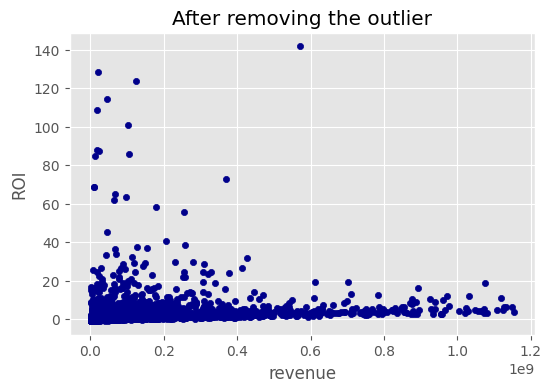

In [128]:
ax1 = u_movie_df.plot.scatter(x ='revenue', y = 'ROI', c='DarkBlue')
plt.title("After removing the outlier")

In [129]:
df_compare = u_movie_df[['revenue', 'ROI']]
df_compare = df_compare.dropna().reset_index()
display(df_compare)

temp_1 =  df_compare[df_compare.revenue >= df_compare.revenue.mean()]
temp_2 =  df_compare[df_compare.revenue < df_compare.revenue.mean()]
temp_1 = temp_1.dropna().reset_index()
temp_2 = temp_2.dropna().reset_index()
temp_1 = temp_1.rename(columns={"ROI": "ROI_1"})
temp_2 = temp_2.rename(columns={"ROI": "ROI_2"})

index    revenue       ROI
0         0  161834276  3.045857
1         1  144056873  2.601422
2         2   45554533  0.518484
3         3   28780255  3.111465
4         4  106371651  1.575585
...     ...        ...       ...
2783   2783   47019435  1.765849
2784   2784   30763855  2.076386
2785   2785   76706000  2.835300
2786   2786   80648577  1.016214
2787   2787   46586903 -0.767065

[2788 rows x 3 columns]

In [130]:
n = df_compare.shape[0] #num of data
print(n)
boo = []

for i in range(n):
    if(df_compare.revenue.iloc[i] >= df_compare.revenue.mean()):
        boo.append('above')
    else:
        boo.append('below')


df_compare['average'] = boo
    
print('Head of dataset:')
display(df_compare.head())

print("Tail of dataset:")
display(df_compare.tail())

2788
Head of dataset:


index    revenue       ROI average
0      0  161834276  3.045857   above
1      1  144056873  2.601422   above
2      2   45554533  0.518484   below
3      3   28780255  3.111465   below
4      4  106371651  1.575585   below

Tail of dataset:


index   revenue       ROI average
2783   2783  47019435  1.765849   below
2784   2784  30763855  2.076386   below
2785   2785  76706000  2.835300   below
2786   2786  80648577  1.016214   below
2787   2787  46586903 -0.767065   below

**檢查是否為常態分佈**

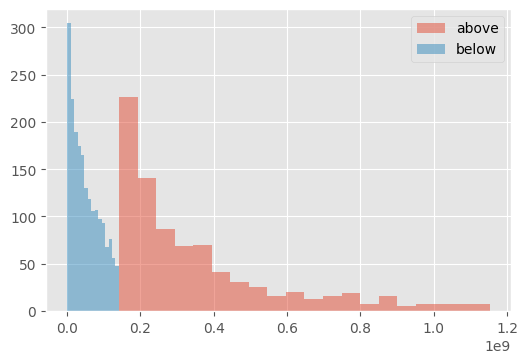

In [131]:
_ = plt.hist(temp_1['revenue'], bins = 'auto', alpha=0.5, label='above')
_ = plt.hist(temp_2['revenue'], bins = 'auto', alpha=0.5, label='below')
plt.legend()
plt.show()

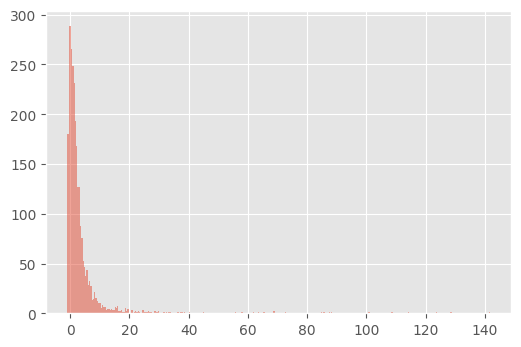

In [132]:
_ = plt.hist(df_compare['ROI'], bins = 'auto', alpha=0.5)
plt.show()

由於資料不是常態分佈，因此我們使用Wilcoxon Rank Sum Test。

**Wilcoxon Signed Rank Sum Test**

+ $H_0:$ The locations of two populations are the same.
+ $H_1:$ The location of population 1(Better Revenue) is to the right of the location of population 2 (i.e., population 1 is greater).

In [133]:
df_compare_ = pd.DataFrame([temp_1["ROI_1"], temp_2["ROI_2"]])
df_compare_ = df_compare_.T

In [134]:
stats.wilcoxon(df_compare_['ROI_1'], df_compare_['ROI_2'], alternative='greater')

WilcoxonResult(statistic=271329.0, pvalue=1.0)

**Friedman Test**


Suppose the data are not normally distributed.


+ $H_0:$ The locations of two populations are the same.
+ $H_1:$ At least two population locations differ.

In [135]:
_ = non.friedman_chi2_test(data=df_compare_)

======= Friedman Test with Chi-squared Test =======
(Number of blocks = 1957 >= 5 or number of populations 2 >= 5)

F_r statistic value (observed) = -10689.0910
chi2 critical value = 3.8415
p-value = 1.0000 (No Evidence)
Reject H_0 (Not all 2 population locations are the same) → False
    


Wilcoxon signed rank sum test 和 Friedman Test 的 $p$-value 皆大於 $\alpha$。因此我們並不能拒絕虛無假設。<br>

**結論：所以我們可以得知票房較好並不代表ROI較高。**

<div class="alert alert-block alert-info">
<b>🍿 你知道嗎？</b><br>
    
2009年，派拉蒙影業公司發行的《鬼影實錄》是目前投資報酬率最高的電影，僅憑1.1萬美金的製作成本，換回了全球1.97億的票房</div>